***Temperature Dataset***

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, rand_score
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.manifold import TSNE

**Data Loading**

In [2]:

x1 = np.load("temper.npz") #load the data

In [3]:
type(x1) #check the type of the data

numpy.lib.npyio.NpzFile

**Data Exploration**

In [4]:
x1.files

['villes', 'data', 'varname']

In [5]:
type(x1['data']) #check the type of data stored in the file

numpy.ndarray

In [6]:
type(x1['villes']) #check the type of cities stored in the file

numpy.ndarray

In [7]:
type(x1['varname']) #check the type of variable names stored in the file

numpy.ndarray

In [8]:
data=x1['data'] #extract the data
villes=x1['villes'] #extract the cities
varnames=x1['varname'] #extract the variable names

temperature=data[:,:12] #extract the temperature data (first 12 columns)

print("\n Matrice des températures (15x12) :") 
print(temperature)

print("\n Noms des villes :")
print(villes)

print("\n Noms des variables/colonnes :")
print(varnames)


 Matrice des températures (15x12) :
[[ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]
 [ 1.5  3.2  7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4  6.5  2.3]
 [ 2.4  2.9  6.   8.9 12.4 15.3 17.1 17.1 14.7 10.4  6.1  3.5]
 [ 2.1  3.3  7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4  6.7  3.1]
 [ 5.5  6.6 10.  13.  16.8 20.8 23.3 22.8 19.9 15.  10.2  6.9]
 [ 5.6  6.7  9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.   6.5]
 [ 5.   5.3  8.4 10.8 13.9 17.2 18.8 18.6 16.4 12.2  8.2  5.5]
 [ 7.5  8.5 10.8 13.3 16.7 20.1 22.7 22.5 20.3 16.  11.5  8.2]
 [ 3.4  4.1  7.6 10.7 14.3 17.5 19.1 18.7 16.  11.4  7.1  4.3]
 [ 4.8  5.3  7.9 10.1 13.1 16.2 17.9 17.8 15.7 11.6  7.8  5.4]
 [ 0.4  1.5  5.6  9.8 14.  17.2 19.  18.3 15.1  9.5  4.9  1.3]
 [ 4.7  5.6  9.2 11.6 14.9 18.7 20.9 20.9 18.3 13.3  8.6  5.5]
 [ 2.4  3.4  7.1  9.9 13.6 17.1 19.3 18.8 16.  11.   6.6  3.4]]

 Noms des villes

**Monthly Average Temperature Calculation and Visualization**

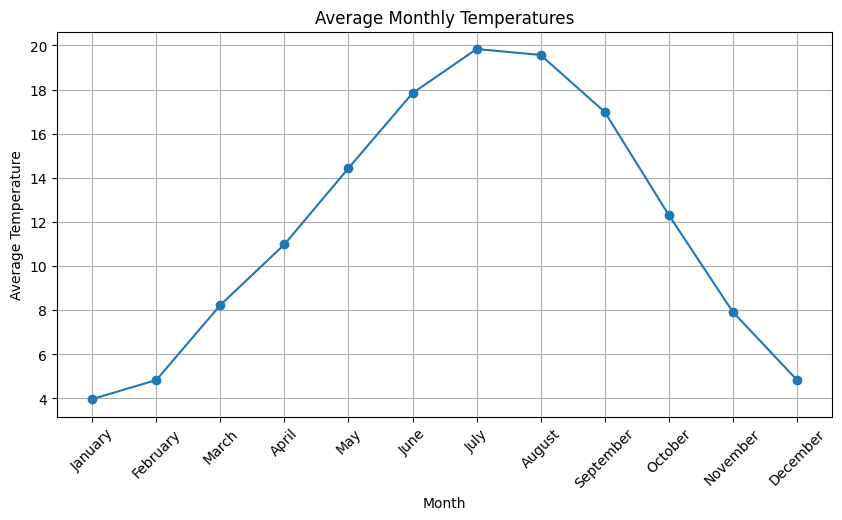

In [9]:
# Calculate the averages for each month
mean_temperatures = np.mean(temperature, axis=0)

# Visualize the averages with plt.plot
plt.figure(figsize=(10, 5))
plt.plot(mean_temperatures, marker='o')
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(ticks=np.arange(12), labels=varnames[:12], rotation=45)
plt.grid(True)
plt.show()

The plot shows that higher temperatures are observed in the summer months (June, July, and August) and lower temperatures in the winter months (December, January, and February).

**Temperature Curves Plotting for Each City**

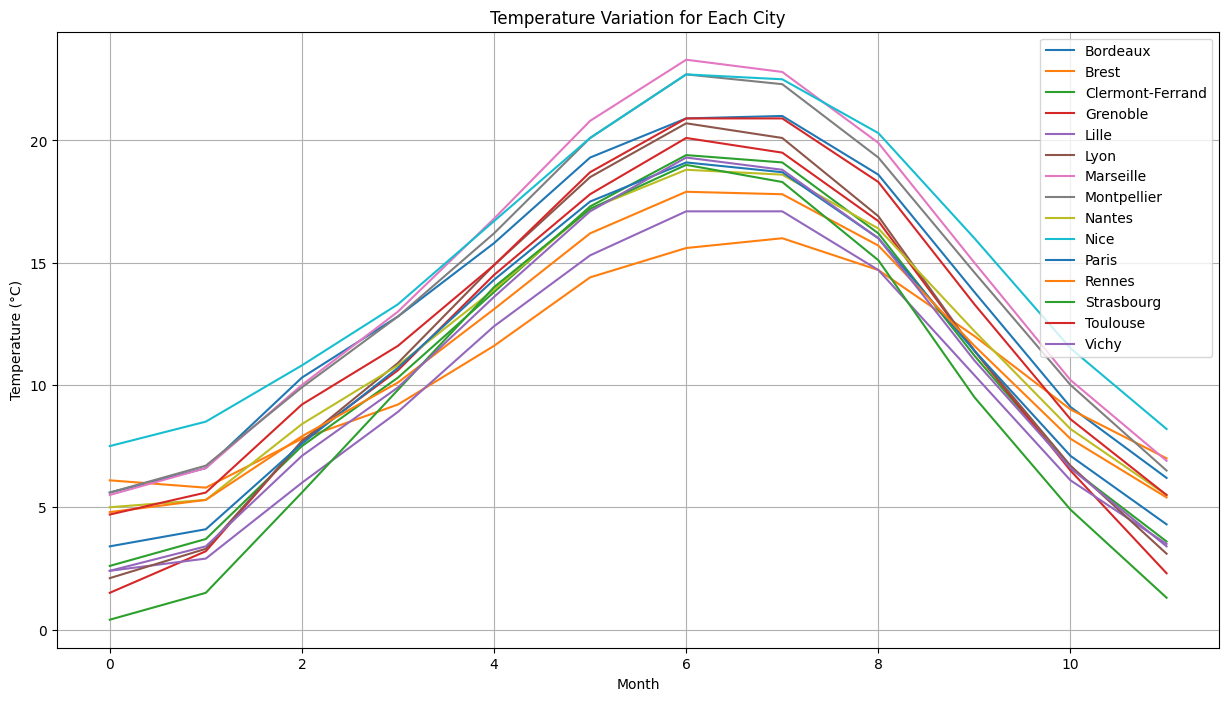

In [10]:

# Plot the temperature curves for each city
plt.figure(figsize=(15, 8))
for i in range(temperature.shape[0]):
    plt.plot(temperature[i], label=villes[i])

plt.title("Temperature Variation for Each City")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(ticks=np.arange(0,12,2))
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Most cities show a similar trend, with temperatures increasing from January to July, peaking in the summer months, and then gradually decreasing towards December.

**Extracting and Plotting City Positions**

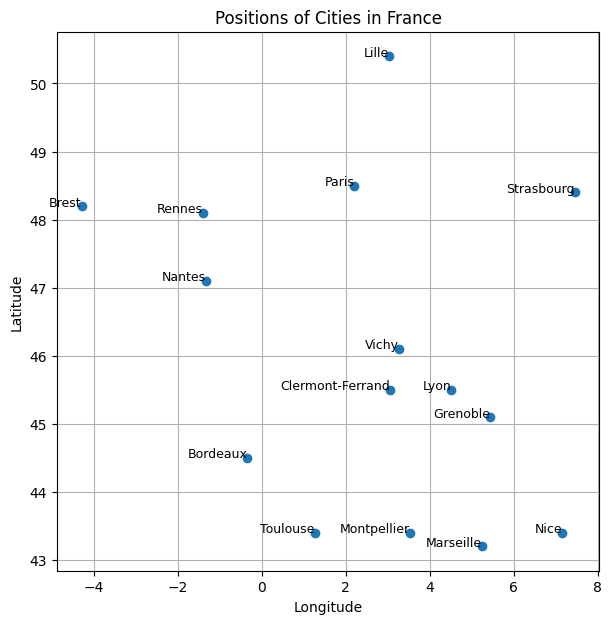

In [11]:
# Extract the latitude and longitude columns
latitude = x1['data'][:, 12]
longitude = x1['data'][:, 13]


# Plot the positions of the cities
plt.figure(figsize=(7, 7))
plt.scatter(longitude, latitude, marker='o')

# Annotate each point with the city name
for i, ville in enumerate(villes):
    plt.text(longitude[i], latitude[i], ville, fontsize=9, ha='right')

plt.title("Positions of Cities in France")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

**K-means clustering**

Starting with K=3 :

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(temperature)
labels = kmeans.labels_  #store the labels
centroids = kmeans.cluster_centers_ #store the centroids



In [13]:
print("Cluster Labels for Each City:")
print(labels)

Cluster Labels for Each City:
[1 2 0 0 2 0 1 1 2 1 0 2 0 1 0]


In [14]:
print(centroids[0].shape)

(12,)


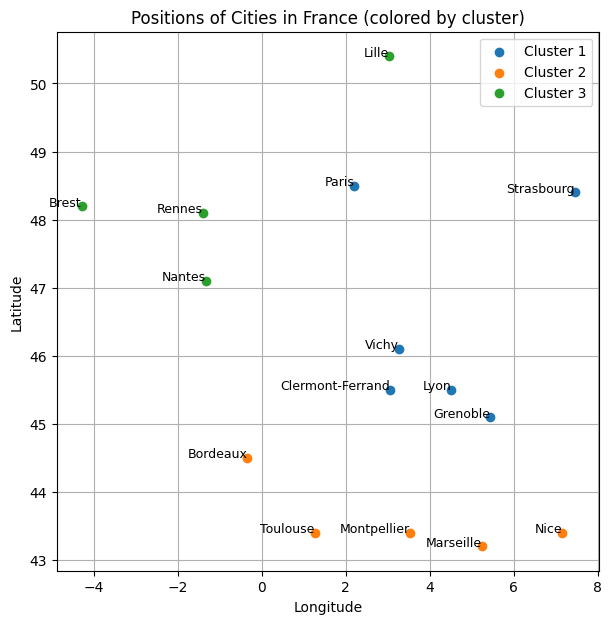

In [15]:

# Extract the latitude and longitude columns
latitude = x1['data'][:, 12]
longitude = x1['data'][:, 13]

# Plot the positions of the cities colored by their cluster
plt.figure(figsize=(7, 7))
for lbel in range(3):
    plt.scatter(longitude[labels==lbel], latitude[labels==lbel], label=f'Cluster {lbel+1}')
# plt.scatter(longitude, latitude, c=labels, cmap='tab10' ,marker='o')

# Annotate each point with the city name
for i, ville in enumerate(villes):
    plt.text(longitude[i], latitude[i], ville, fontsize=9, ha='right')


plt.title("Positions of Cities in France (colored by cluster)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

plt.show()


This plot shows the geographic positions of the 15 French cities colored by their temperature-based KMeans cluster (K=3). Although clustering was done purely on monthly temperature profiles, the resulting groups align well with geography. So, the clustering recover a geographical similarity between the cities because each region has a specific temperature range and climate patterns are largely influenced by geographic location. Southern cities like Nice, Marseille, and Toulouse are grouped together, reflecting their warmer Mediterranean climate. Western coastal cities like Brest and Nantes form a separate cluster, likely due to their oceanic, milder climate. Northern and eastern cities such as Lille, Paris, and Strasbourg are grouped into another cluster, corresponding to a more continental climate. This demonstrates that temperature-based clustering effectively captures regional climate similarities.

***Finding the optimal value of K***

To choose the best value of K, I searched online and found a helpful article on GeeksforGeeks:
https://www.geeksforgeeks.org/machine-learning/ml-determine-the-optimal-value-of-k-in-k-means-clustering/

From the different methods listed, I chose the **Elbow method** because it is simple to understand and easy to use. This method helps to find the value of K where adding more clusters does not improve the result much, which usually shows as a “bend” or “elbow” in the plot.

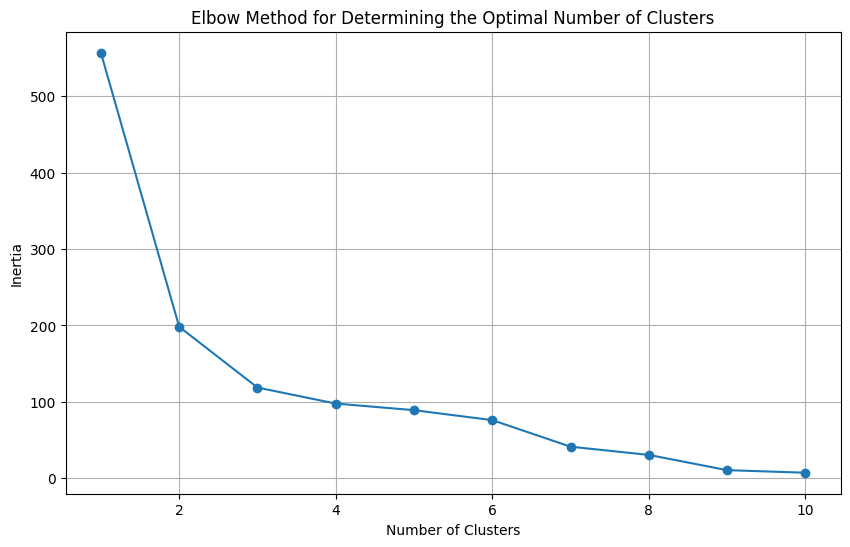

In [16]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(temperature)
    inertias.append(kmeans.inertia_)

# Plot the inertia curve as a function of the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Determining the Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

We observe that the elbow occurs at ( k = 2 ), where the inertia value begins to decline at a slower pace. However, at ( k = 3 ), the inertia value continues to decrease at a notable rate. Consequently, both ( k = 2 ) and ( k = 3 ) can be considered for analysis and comparison of the results.

Let's train now the K-means model with K=2 and visualize the clusters :

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(temperature)
labels = kmeans.labels_  #store the labels
centroids = kmeans.cluster_centers_ #store the centroids

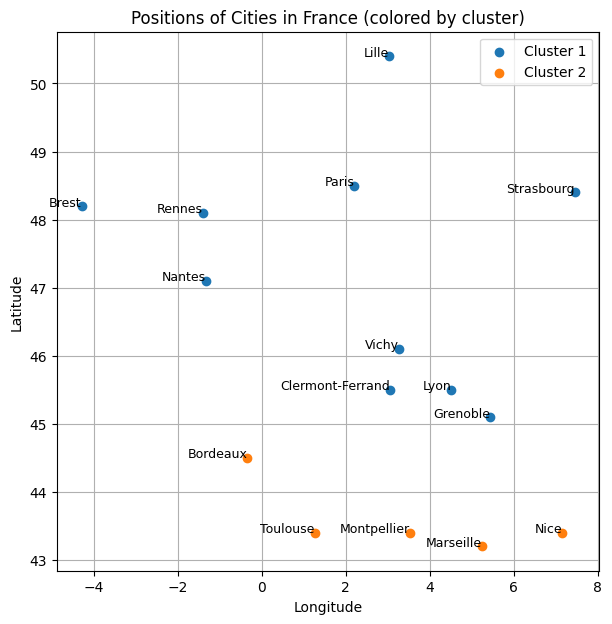

In [18]:
# Extract the latitude and longitude columns
latitude = x1['data'][:, 12]
longitude = x1['data'][:, 13]

# Plot the positions of the cities colored by their cluster
plt.figure(figsize=(7, 7))
for lbel in range(2):
    plt.scatter(longitude[labels==lbel], latitude[labels==lbel], label=f'Cluster {lbel+1}')
# plt.scatter(longitude, latitude, c=labels, cmap='tab10' ,marker='o')

# Annotate each point with the city name
for i, ville in enumerate(villes):
    plt.text(longitude[i], latitude[i], ville, fontsize=9, ha='right')


plt.title("Positions of Cities in France (colored by cluster)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

plt.show()

This plot shows the cities grouped into 2 clusters based on their temperature profiles. We can see that most of the northern and central cities like Paris, Lille, and Strasbourg are in one cluster, while southern cities like Nice, Marseille, and Toulouse are in the other. The model separates the cities mainly based on warm vs. cold climates.

Compared to the previous case with K = 3, this result is more general and less detailed. With K = 3, we had a better separation between south, west coast, and north/east. So while K = 2 gives a rough climate split, K = 3 gives more meaningful and specific groups.

**Density estimation**

Starting with K=2

In [19]:
# Set up and fit the GMM
gmm = GaussianMixture(n_components=2, covariance_type='diag', random_state=42)
gmm.fit(temperature)

# Predict the labels (clusters) for each city
labels = gmm.predict(temperature)

# Get the GMM parameters
weights = gmm.weights_
means = gmm.means_
covariances = gmm.covariances_
std_devs = np.sqrt(covariances)  

# Output the results
print("Villes:", villes)
print("Cluster labels:", labels)
print("Weights:", weights)
print("Means:", means)
print("Covariances:", covariances)

Villes: ['Bordeaux' 'Brest' 'Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon'
 'Marseille' 'Montpellier' 'Nantes' 'Nice' 'Paris' 'Rennes' 'Strasbourg'
 'Toulouse' 'Vichy']
Cluster labels: [1 0 0 0 0 0 1 1 0 1 0 0 0 1 0]
Weights: [0.66666671 0.33333329]
Means: [[ 3.07000012  3.85000012  7.33000013 10.1200001  13.61000009 16.85000013
  18.70000016 18.40000018 15.84000017 11.21000015  6.95000012  3.94000011]
 [ 5.78000015  6.80000017 10.04000012 12.70000016 16.08000017 19.80000016
  22.10000017 21.90000014 19.28000014 14.54000018  9.88000018  6.66000016]]
Covariances: [[2.76610099 1.54450111 0.6881012  0.41560113 0.89690105 1.33850115
  1.9880012  1.27000135 0.55240139 0.54890127 1.19450111 2.502401  ]
 [0.85360096 0.88400092 0.27440094 0.33600088 0.47760087 0.5280009
  1.00800094 0.62800095 0.56960094 0.88640091 0.99760091 0.80240092]]


The GMM split the 15 cities into two clusters based on their temperature profiles. Cluster 1 contains warmer cities (like Nice, Marseille, Bordeaux), while Cluster 0 contains cooler cities (like Lille, Paris, Brest). The weights show that most cities belong to Cluster 0. The means confirm that cities in Cluster 1 have higher temperatures in all months, making them easily distinguishable. GMM also gives information about the variability of temperatures in each group: we observe that Cluster 0 has higher variance, meaning temperatures vary more between cities in that group. In contrast, Cluster 1 has lower variance, so the cities in this group have more similar and stable temperature profiles.

In [20]:
longitude[labels == 0]

array([-4.29,  3.05,  5.43,  3.04,  4.51, -1.33,  2.2 , -1.41,  7.45,
        3.26])

In [21]:
longitude[labels == 1]

array([-0.34,  5.24,  3.53,  7.15,  1.26])

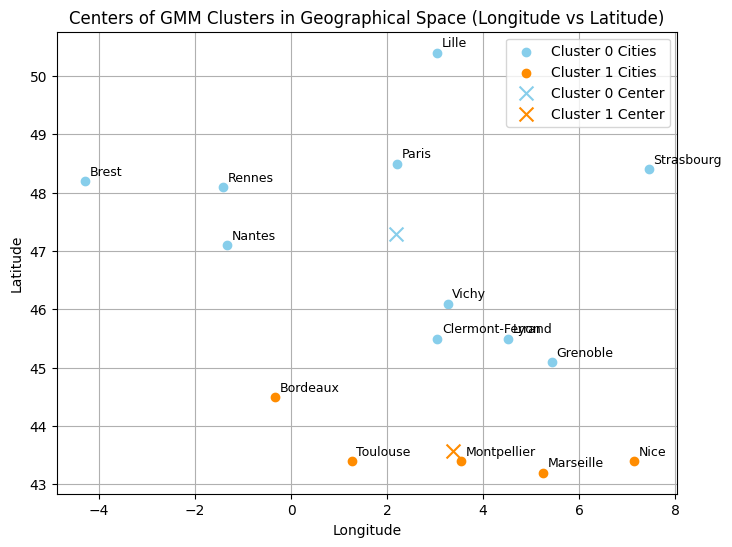

In [22]:
# Calculate the geographical centers (latitude and longitude) for each cluster
cluster_0_center = [latitude[labels == 0].mean(), longitude[labels == 0].mean()]
cluster_1_center = [latitude[labels == 1].mean(), longitude[labels == 1].mean()]

# Plot the geographical position of the cities with the cluster centers
plt.figure(figsize=(8, 6))

# Scatter plot for cities in Cluster 0 
plt.scatter(longitude[labels == 0], latitude[labels == 0], color='skyblue', marker='o', label='Cluster 0 Cities')

# Scatter plot for cities in Cluster 1 
plt.scatter(longitude[labels == 1], latitude[labels == 1], color='darkorange', marker='o', label='Cluster 1 Cities')

# Plot the cluster centers
plt.scatter(cluster_0_center[1], cluster_0_center[0], color='skyblue', label='Cluster 0 Center', marker='x', s=100)
plt.scatter(cluster_1_center[1], cluster_1_center[0], color='darkorange', label='Cluster 1 Center', marker='x', s=100)

# Annotate the cities with their names
for i, ville in enumerate(villes):
    plt.text(longitude[i] + 0.1, latitude[i] + 0.1, ville, fontsize=9)

# Add plot titles and labels
plt.title('Centers of GMM Clusters in Geographical Space (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

The centers of the Gaussian distributions in the mixture model represent the mean temperatures for each cluster. This analysis helps to identify distinct temperature patterns and trends for different groups of cities based on their geographical locations and climate characteristics. We notice that for K = 2, the red cluster is the one with the highest temperatures represting the southern cities of France and the blue cluster is the one with the lowest temperatures representing the northern and eastern cities of France.

Now let's estimate a GMM density on the data with K=3

In [23]:
# Set up and fit the GMM
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm.fit(temperature)

# Predict the labels (clusters) for each city
labels = gmm.predict(temperature)

# Get the GMM parameters
weights = gmm.weights_
means = gmm.means_
covariances = gmm.covariances_
std_devs = np.sqrt(covariances)

# Output the results
print("Villes:", villes)
print("Cluster labels:", labels)
print("Weights:", weights)
print("Means:", means)
print("Covariances:", covariances)

Villes: ['Bordeaux' 'Brest' 'Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon'
 'Marseille' 'Montpellier' 'Nantes' 'Nice' 'Paris' 'Rennes' 'Strasbourg'
 'Toulouse' 'Vichy']
Cluster labels: [1 2 0 0 0 0 1 1 2 1 0 2 0 1 0]
Weights: [0.46666667 0.33333333 0.2       ]
Means: [[ 2.11428573  3.15714287  7.02857143 10.15714286 13.92857143 17.24285714
  19.24285714 18.8        15.94285714 10.90000001  6.35714287  3.07142858]
 [ 5.78        6.8        10.04       12.7        16.08       19.8
  22.1        21.9        19.28       14.54        9.88        6.66      ]
 [ 5.3         5.46666667  8.03333333 10.03333333 12.86666666 15.93333332
  17.43333332 17.46666666 15.59999999 11.93333333  8.33333334  5.96666667]]
Covariances: [[0.76693981 0.58245    0.65061325 0.40530712 0.55347039 0.82244998
  1.07959284 0.77428671 0.54530712 0.43714386 0.42816428 0.83061327]
 [0.853601   0.884001   0.274401   0.336001   0.477601   0.528001
  1.008001   0.628001   0.569601   0.886401   0.997601   0.802401  ]
 [0.3266

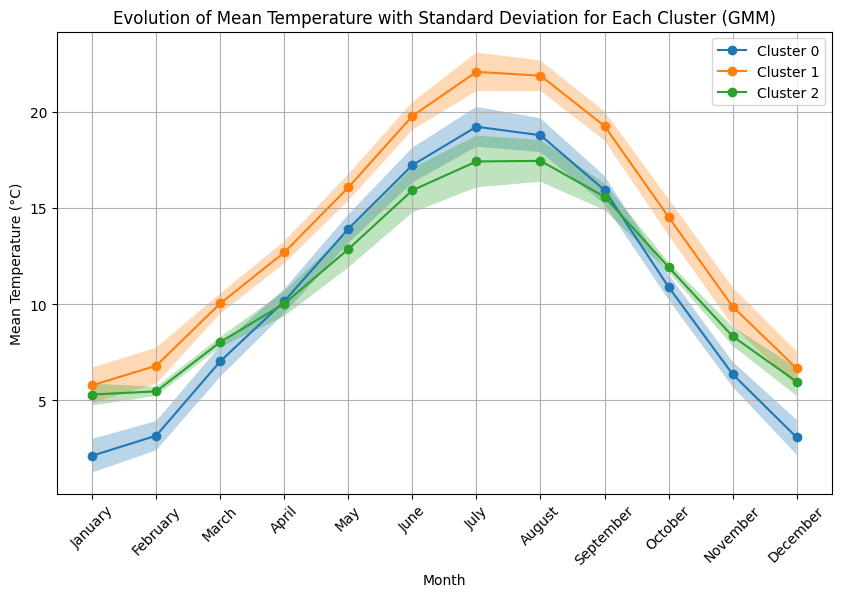

In [24]:
# Plot the evolution of the mean temperature with standard deviation
plt.figure(figsize=(10, 6))

# For each cluster, plot the mean and fill the standard deviation band
for i in range(gmm.n_components):
    plt.plot(means[i], label=f'Cluster {i }', marker='o')

    # Fill the area between mean ± std_dev
    plt.fill_between(np.arange(12), 
                     means[i] - std_devs[i], 
                     means[i] + std_devs[i], 
                     alpha=0.3)

plt.title("Evolution of Mean Temperature with Standard Deviation for Each Cluster (GMM)")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.xticks(ticks=np.arange(12), labels=varnames[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show() 

To better compare the clustering results with K = 2, I added this plot showing the average monthly temperatures of each cluster found by the GMM model when K = 3, along with a shaded area that represents the standard deviation (how much temperatures vary inside each cluster).

- Cluster 0 (High Temperature): This cluster represents areas where temperatures are significantly higher, particularly in summer. The data shows a consistently high average temperature, with a relatively low standard deviation, indicating a certain stability of temperatures in this region.
- Cluster 1: In summer, the temperatures are higher than those of Cluster 2, while in winter, the temperatures are lower than those of Cluster 2.
- Cluster 2: In summer, this cluster exhibits lower temperatures compared to Cluster 2, indicating a cooler climate. In winter, the trend reverses, with higher temperatures compared to Cluster 1.

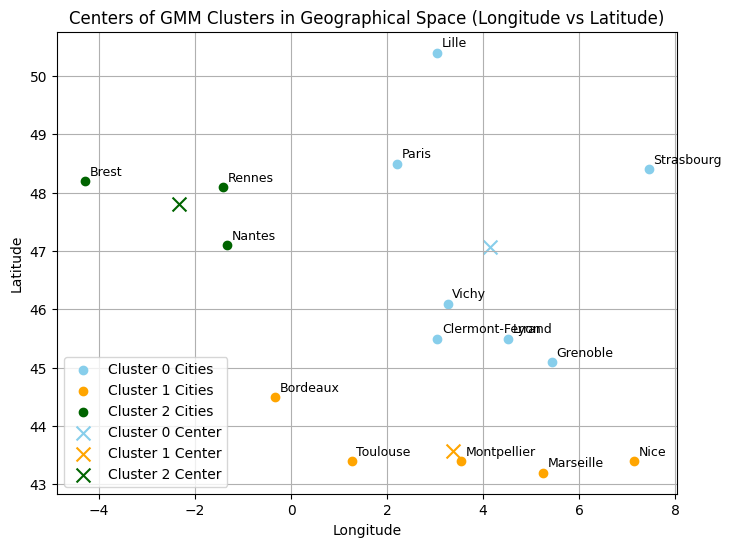

In [25]:
# Calculate the geographical centers (latitude and longitude) for each cluster
cluster_0_center = [latitude[labels == 0].mean(), longitude[labels == 0].mean()]
cluster_1_center = [latitude[labels == 1].mean(), longitude[labels == 1].mean()]
cluster_2_center = [latitude[labels == 2].mean(), longitude[labels == 2].mean()]

# Plot the geographical position of the cities with the cluster centers
plt.figure(figsize=(8, 6))

# Scatter plot for cities in Cluster 0 (e.g., red)
plt.scatter(longitude[labels == 0], latitude[labels == 0], color='skyblue',  marker='o', label='Cluster 0 Cities')

# Scatter plot for cities in Cluster 1 (e.g., blue)
plt.scatter(longitude[labels == 1], latitude[labels == 1], color='orange',  marker='o', label='Cluster 1 Cities')

# Scatter plot for cities in Cluster 2 (e.g., green)
plt.scatter(longitude[labels == 2], latitude[labels == 2], color='darkgreen',  marker='o', label='Cluster 2 Cities')

# Plot the cluster centers
plt.scatter(cluster_0_center[1], cluster_0_center[0], color='skyblue', label='Cluster 0 Center', marker='x', s=100)
plt.scatter(cluster_1_center[1], cluster_1_center[0], color='orange', label='Cluster 1 Center', marker='x', s=100)
plt.scatter(cluster_2_center[1], cluster_2_center[0], color='darkgreen', label='Cluster 2 Center', marker='x', s=100)

# Annotate the cities with their names
for i, ville in enumerate(villes):
    plt.text(longitude[i] + 0.1, latitude[i] + 0.1, ville, fontsize=9)

# Add plot titles and labels
plt.title('Centers of GMM Clusters in Geographical Space (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

For k=3, The clusters are more clearly separated compared to k=2, where each cluster represents a distinct temperature profile based on the geographical characteristics of the cities. For example, Cluster 0 represents cities located in the northern and eastern regions of France, which experience lower temperatures throughout the year. Cluster 1 includes cities with moderate temperatures, while Cluster 2 consists of cities in the southern regions with higher temperatures. The distinct temperature patterns observed in each cluster highlight the influence of geographical location on climate and temperature variations.

In Gaussian Mixture Models (GMM), four types of covariance are available:

1. Full: Each component has its own full covariance matrix, allowing each component to have a unique shape, orientation, and size across all dimensions.
2. Tied: All components share the same general covariance matrix, which forces all components to have the same shape and orientation, encouraging a more spherical distribution.
3. Diag: Each component has its own diagonal covariance matrix, allowing components to have different variances along each dimension, but assuming no correlation between dimensions.
4. Spherical: Each component has its own unique variance, assuming that the shape of each component is spherical, with a single variance across all dimensions.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_31544\638725730.py:21: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.sqrt(covariances)


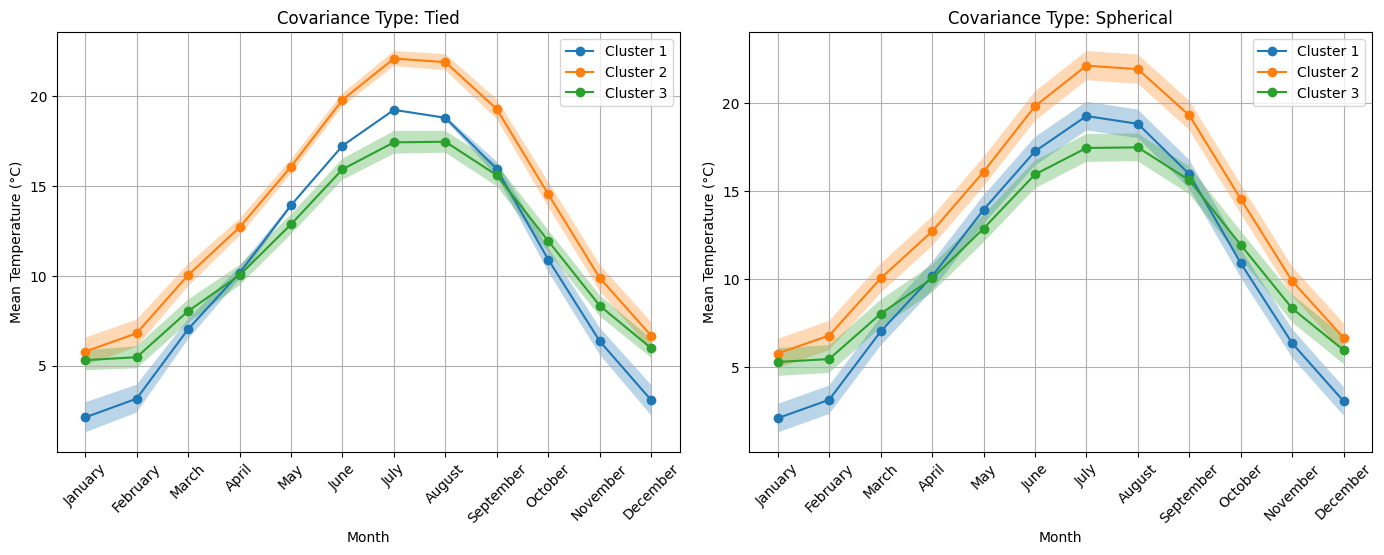

In [26]:
# Covariance types to test
covariance_types = ['tied','spherical']

# Initialize the figure
plt.figure(figsize=(14, 10))

# Loop over the different covariance types and fit GMM for each
for idx, cov_type in enumerate(covariance_types):
    # Create and fit the GMM model
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm.fit(temperature)
    
    # Predict the labels (clusters) for each city
    labels = gmm.predict(temperature)

    # Get the GMM parameters
    means = gmm.means_
    
    covariances = gmm.covariances_
    
    std_devs = np.sqrt(covariances)

    # Create a subplot for each covariance type
    plt.subplot(2, 2, idx + 1)

    # Plot the evolution of the mean temperature with standard deviation
    for i in range(gmm.n_components):
        plt.plot(means[i], label=f'Cluster {i + 1}', marker='o')

        # Fill the area between mean ± std_dev
        plt.fill_between(np.arange(12), 
                         means[i] - std_devs[i], 
                         means[i] + std_devs[i], 
                         alpha=0.3)

    plt.title(f"Covariance Type: {cov_type.capitalize()}")
    plt.xlabel("Month")
    plt.ylabel("Mean Temperature (°C)")
    plt.xticks(ticks=np.arange(12), labels=varnames[:12], rotation=45)
    plt.legend()
    plt.grid(True)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

The two plots above represent the evolution of mean temperatures with 2 covariance types ('tied' and 'spherical') for three clusters over 12 months. The differences could be attributed to the different covariance types used in the Gaussian Mixture Model (GMM) for each plot, affecting how clusters are shaped and how much overlap there is between them but in general, the results are similar.

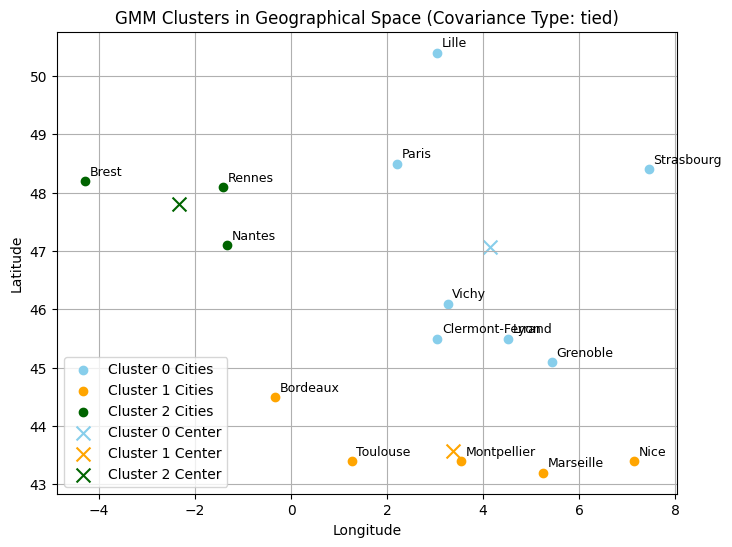

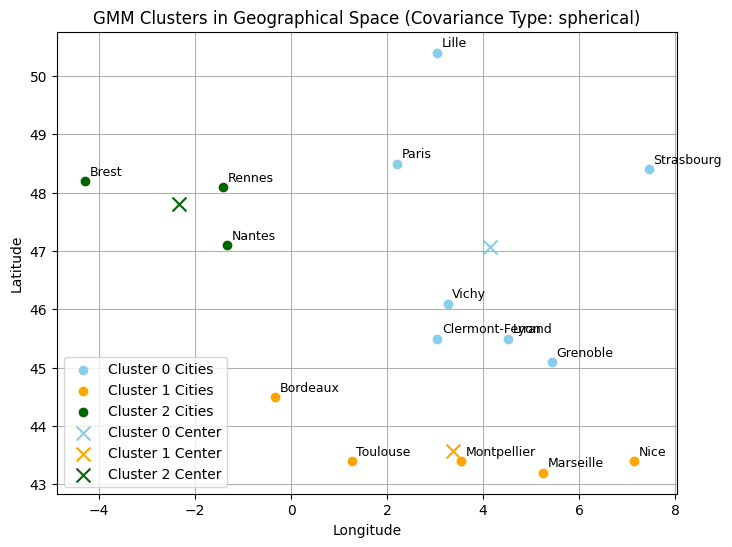

In [27]:
for covariance_type in covariance_types:
    # Initialize the GMM model for each covariance type
    gmm = GaussianMixture(n_components=3, covariance_type=covariance_type, random_state=42)
    
    # Fit the GMM model to the temperature data
    gmm.fit(temperature)

    # Predict the cluster labels for each city
    labels = gmm.predict(temperature)

    # Calculate the geographical centers (latitude and longitude) for each cluster
    cluster_0_center = [latitude[labels == 0].mean(), longitude[labels == 0].mean()]
    cluster_1_center = [latitude[labels == 1].mean(), longitude[labels == 1].mean()]
    cluster_2_center = [latitude[labels == 2].mean(), longitude[labels == 2].mean()]

    # Create a new figure for each covariance type
    plt.figure(figsize=(8, 6))

    # Scatter plot for cities in Cluster 0 (orange)
    plt.scatter(longitude[labels == 0], latitude[labels == 0], color='skyblue', marker='o', label='Cluster 0 Cities')

    # Scatter plot for cities in Cluster 1 (blue)
    plt.scatter(longitude[labels == 1], latitude[labels == 1], color='orange', marker='o', label='Cluster 1 Cities')

    # Scatter plot for cities in Cluster 2 (green)
    plt.scatter(longitude[labels == 2], latitude[labels == 2], color='darkgreen', marker='o', label='Cluster 2 Cities')

    # Plot the cluster centers
    plt.scatter(cluster_0_center[1], cluster_0_center[0], color='skyblue', label='Cluster 0 Center', marker='x', s=100)
    plt.scatter(cluster_1_center[1], cluster_1_center[0], color='orange', label='Cluster 1 Center', marker='x', s=100)
    plt.scatter(cluster_2_center[1], cluster_2_center[0], color='darkgreen', label='Cluster 2 Center', marker='x', s=100)

    # Annotate the cities with their names
    for i, ville in enumerate(villes):
        plt.text(longitude[i] + 0.1, latitude[i] + 0.1, ville, fontsize=9)

    # Add plot titles and labels
    plt.title(f'GMM Clusters in Geographical Space (Covariance Type: {covariance_type})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

The clusters remained consistent in terms of their temperature profiles and separation, indicating that the choice of covariance type did not have a substantial impact on the clustering results for this dataset.

Let's try now to use the full covariance type to see if it will have an impact on the clustering results.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_31544\301386621.py:13: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.sqrt(covariances)  # Standard deviation for plotting


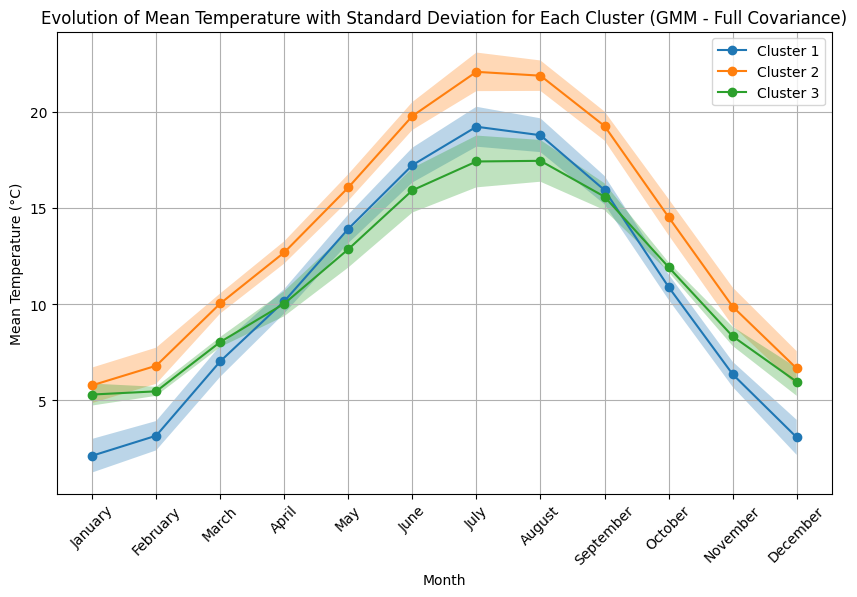

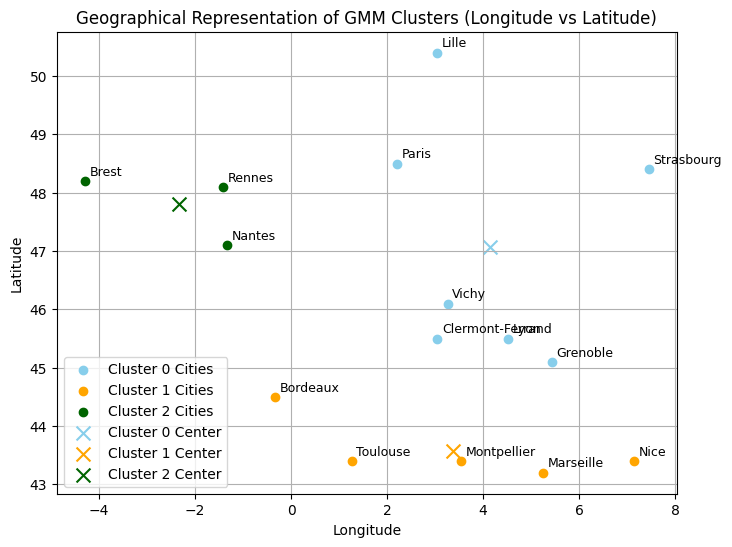

In [28]:
# Initialize the GMM model with full covariance type
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)

# Fit the GMM model to the temperature data (temperature_matrix)
gmm.fit(temperature)

# Predict the labels (clusters) for each city based on the GMM model
labels = gmm.predict(temperature)

# Get the GMM parameters: means and covariances
means = gmm.means_
covariances = gmm.covariances_
std_devs = np.sqrt(covariances)  # Standard deviation for plotting

# Plot the evolution of the mean temperature for each cluster
plt.figure(figsize=(10, 6))

# For each cluster, plot the mean and fill the standard deviation band
for i in range(gmm.n_components):
    plt.plot(means[i], label=f'Cluster {i + 1}', marker='o')

    # Fill the area between mean ± std_dev (only works for diagonal elements)
    plt.fill_between(np.arange(12), 
                     means[i] - np.diag(std_devs[i]), 
                     means[i] + np.diag(std_devs[i]), 
                     alpha=0.3)

plt.title("Evolution of Mean Temperature with Standard Deviation for Each Cluster (GMM - Full Covariance)")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.xticks(ticks=np.arange(12), labels= varnames[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Now, plot the geographical representation of the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for cities in Cluster 0
plt.scatter(longitude[labels == 0], latitude[labels == 0], color='skyblue', marker='o', label='Cluster 0 Cities')

# Scatter plot for cities in Cluster 1
plt.scatter(longitude[labels == 1], latitude[labels == 1], color='orange', marker='o', label='Cluster 1 Cities')

# Scatter plot for cities in Cluster 2
plt.scatter(longitude[labels == 2], latitude[labels == 2], color='darkgreen', marker='o', label='Cluster 2 Cities')

# Plot the cluster centers
cluster_0_center = [latitude[labels == 0].mean(), longitude[labels == 0].mean()]
cluster_1_center = [latitude[labels == 1].mean(), longitude[labels == 1].mean()]
cluster_2_center = [latitude[labels == 2].mean(), longitude[labels == 2].mean()]

plt.scatter(cluster_0_center[1], cluster_0_center[0], color='skyblue', label='Cluster 0 Center', marker='x', s=100)
plt.scatter(cluster_1_center[1], cluster_1_center[0], color='orange', label='Cluster 1 Center', marker='x', s=100)
plt.scatter(cluster_2_center[1], cluster_2_center[0], color='darkgreen', label='Cluster 2 Center', marker='x', s=100)

# Annotate the cities with their names
for i, ville in enumerate(villes):
    plt.text(longitude[i] + 0.1, latitude[i] + 0.1, ville, fontsize=9)

# Add plot titles and labels
plt.title('Geographical Representation of GMM Clusters (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

While using the 'full' covariance type, we get as well similar results to the previous ones. The clusters are consistent in terms of their temperature profiles and separation, indicating that the choice of covariance type did not have a substantial impact on the clustering results for this dataset.



**Log Probability**

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_31544\1667955559.py:46: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(center[1], center[0], color='black', label=f'Cluster {i} Center', marker='x', s=200, edgecolor='white')


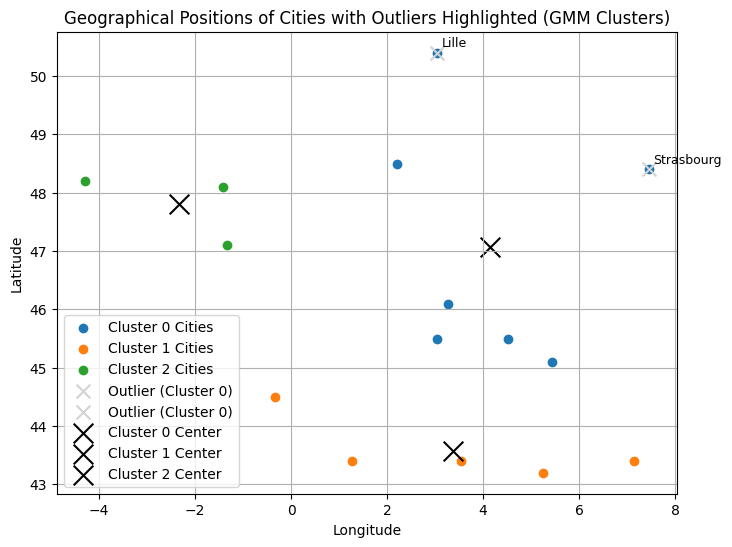

In [29]:
# Set up and fit the GMM
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)
gmm.fit(temperature)

# Compute the log probability (log likelihood) for each sample (city's temperature over 12 months)
log_probs = gmm.score_samples(temperature)

# Sort the samples by log probability to find the ones with the smallest scores (potential outliers)
outlier_indices = np.argsort(log_probs)[:2]  # Take the 2 samples with the lowest log probability

# Recover the outlier cities (their temperature data and corresponding geographical info)
outlier_temperatures = temperature[outlier_indices]
outlier_latitudes = latitude[outlier_indices]
outlier_longitudes = longitude[outlier_indices]
outlier_villes = [villes[i] for i in outlier_indices]

# Calculate the geographical centers (latitude and longitude) for each cluster
cluster_centers = []
for i in range(gmm.n_components):
    cluster_center = [latitude[labels == i].mean(), longitude[labels == i].mean()]
    cluster_centers.append(cluster_center)

plt.figure(figsize=(8, 6))

# --------- Geographical Positions Plot ---------
# Scatter plot for cities in Cluster 0 
plt.scatter(longitude[labels == 0], latitude[labels == 0],  marker='o', label='Cluster 0 Cities')

# Scatter plot for cities in Cluster 1 
plt.scatter(longitude[labels == 1], latitude[labels == 1],  marker='o', label='Cluster 1 Cities')

# Scatter plot for cities in Cluster 2 
plt.scatter(longitude[labels == 2], latitude[labels == 2],  marker='o', label='Cluster 2 Cities')

# Highlight outliers in the corresponding cluster colors but with 'x' marker and larger size
for i in outlier_indices:
    if labels[i] == 0:
        plt.scatter(longitude[i], latitude[i], color='lightgray', marker='x', s=100, label='Outlier (Cluster 0)')
    elif labels[i] == 1:
        plt.scatter(longitude[i], latitude[i], color='lightgray', marker='x', s=100, label='Outlier (Cluster 1)')
    elif labels[i] == 2:
        plt.scatter(longitude[i], latitude[i], color='lightgray', marker='x', s=100, label='Outlier (Cluster 2)')

# Plot the cluster centers
for i, center in enumerate(cluster_centers):
    plt.scatter(center[1], center[0], color='black', label=f'Cluster {i} Center', marker='x', s=200, edgecolor='white')

# Annotate the outliers with their city names
for i, ville in enumerate(outlier_villes):
    plt.text(outlier_longitudes[i] + 0.1, outlier_latitudes[i] + 0.1, ville, fontsize=9)

# Add plot titles and labels for the first subplot
plt.title('Geographical Positions of Cities with Outliers Highlighted (GMM Clusters)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


Strasbourg and Lille are the cities with the smallest log probability, which means that they are the cities that are the least likely to be in the clusters that they are in. This is mainly because they are far from the clusters centers and this could be due to the fact that they are cities that are located in the north of France and that they have a climate that is different from the other cities in the same cluster.

**Dimensionality Reduction**

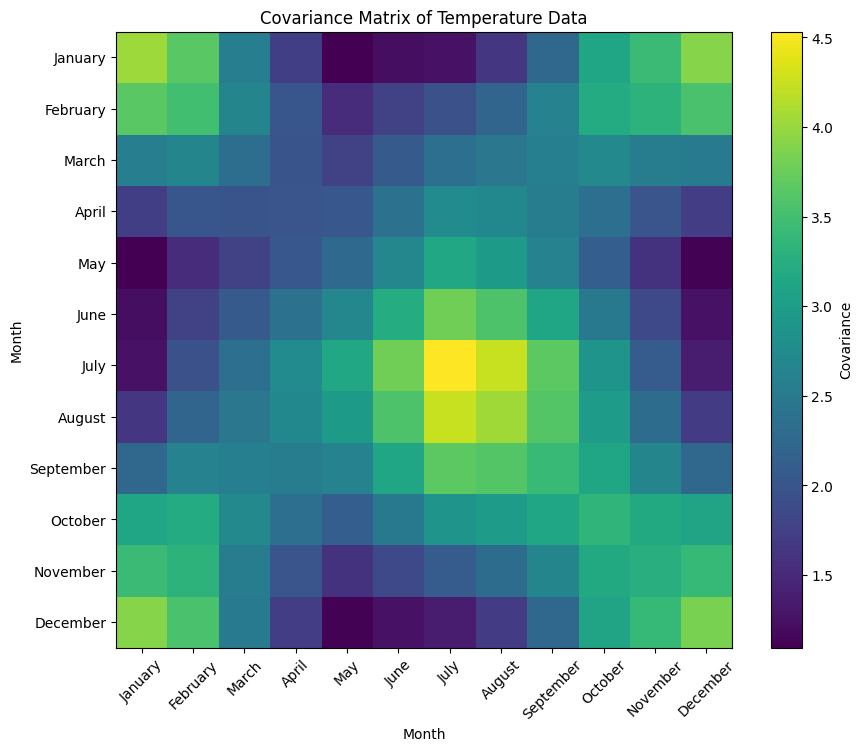

In [30]:
# Compute the covariance matrix of the temperature data
cov_matrix = np.cov(temperature.T)

# Plot the covariance matrix as an image
plt.figure(figsize=(10, 8))
plt.imshow(cov_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix of Temperature Data')
plt.xlabel('Month')
plt.ylabel('Month')
plt.xticks(ticks=np.arange(12), labels=varnames[:12], rotation=45)
plt.yticks(ticks=np.arange(12), labels=varnames[:12])
plt.grid(False)
plt.show()

This plot shows the covariance matrix of the temperature data, where each row and column represents a month of the year. The colors show how strongly temperatures in two months vary together across the 15 cities.

We can clearly see that:

- Nearby months (e.g., June and July, or November and December) have high covariance, meaning their temperatures change similarly across cities.

- Distant months (like January and July) have low covariance, which is expected because winter and summer temperatures behave in opposite ways.

**Principal Components Analysis (PCA)**

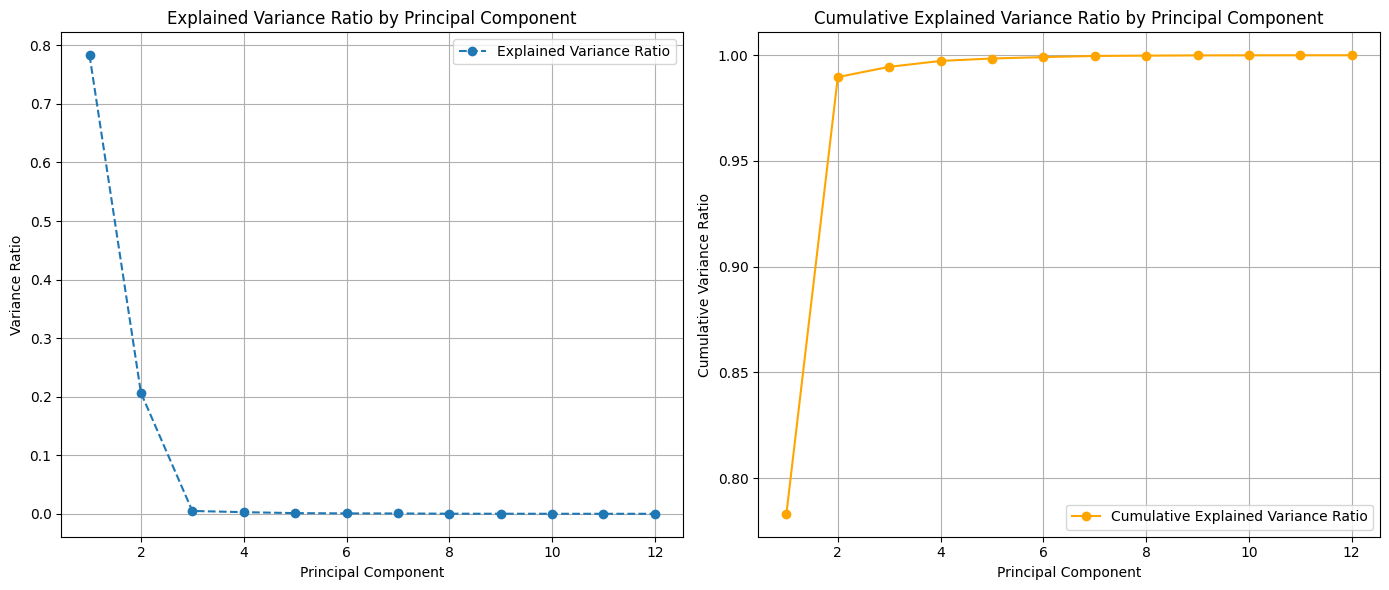

In [31]:
# Perform PCA on the temperature data
pca = PCA(n_components=None)
pca.fit(temperature)

# Recover the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the explained variance ratio
axs[0].plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
            marker='o', linestyle='--', label='Explained Variance Ratio')
axs[0].set_title('Explained Variance Ratio by Principal Component')
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Variance Ratio')
axs[0].legend()
axs[0].grid(True)

# Plot the cumulative explained variance ratio
axs[1].plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), 
            cumulative_explained_variance_ratio, marker='o', linestyle='-', 
            label='Cumulative Explained Variance Ratio', color='orange')
axs[1].set_title('Cumulative Explained Variance Ratio by Principal Component')
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Cumulative Variance Ratio')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Explained Variance Ratio (Blue Dots and Dashed Line):

- The blue dashed line represents the explained variance ratio for each principal component (PC). This value shows the proportion of the total dataset's variance captured by each component.
- The sharp decrease after the first two components indicates that most of the variance is captured by the first few components, with subsequent components capturing much less.

Cumulative Explained Variance Ratio (Orange Line):

- The orange line shows the cumulative explained variance ratio, which represents the total variance captured by the first p components.
- As we can see, the curve plateaus after the second component, indicating that almost all the variance is captured by the first two principal components.


This two plots suggest that the first two components are highly informative, and projecting onto just two dimensions would capture almost all of the variability in the original high-dimensional data and retain most of the original information.

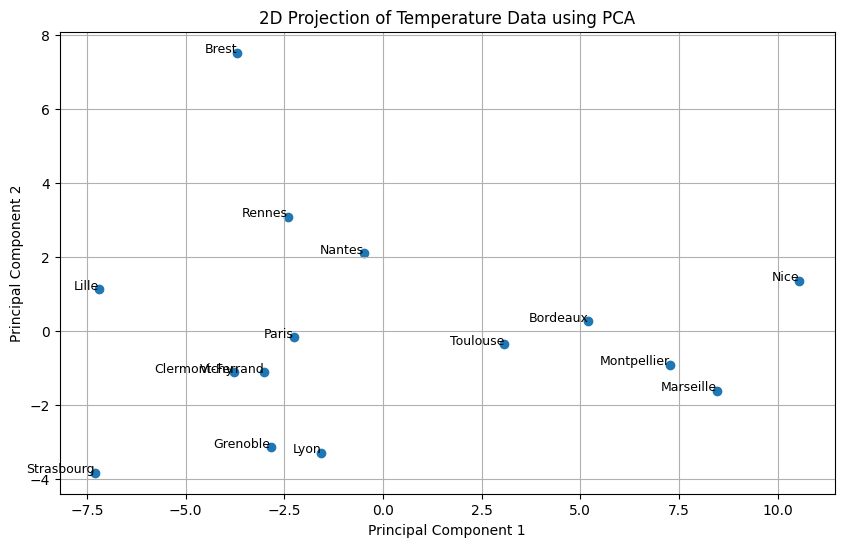

In [32]:
# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
projected_data = pca.fit_transform(temperature)

# Plot the projected samples
plt.figure(figsize=(10, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], marker='o')

# Annotate each point with the city name
for i, city in enumerate(villes):
    plt.text(projected_data[i, 0], projected_data[i, 1], city, fontsize=9, ha='right')

plt.title("2D Projection of Temperature Data using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

The PCA plot shows French cities projected onto two dimensions based on their temperature data. Cities that are close together, like Nice and Marseille or Lyon and Grenoble, have similar climates. So PCA successfully reduces the data while preserving major climate-related differences, even if geographic proximity isn't perfectly reflected.


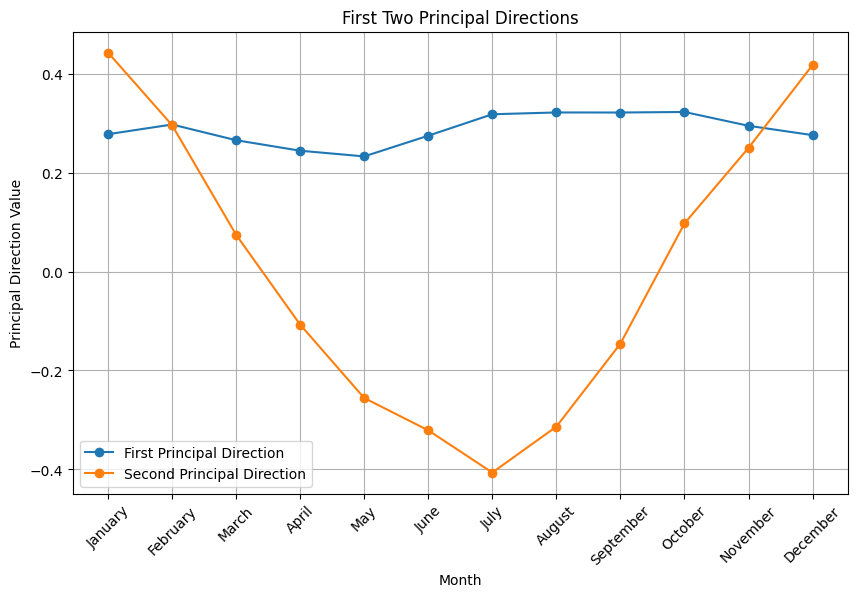

First Principal Direction: [0.27765046 0.29726177 0.26549892 0.24426184 0.23276055 0.27461466
 0.31796069 0.32160147 0.32149157 0.32257588 0.2946594  0.27575128]
Second Principal Direction: [ 0.44271144  0.29596995  0.07437784 -0.10733591 -0.25565325 -0.3209949
 -0.40635887 -0.31355378 -0.1457905   0.09718023  0.25000485  0.41750952]


In [33]:
# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
pca.fit(temperature)

# Get the first two principal directions
principal_directions = pca.components_

# Plot the principal directions
plt.figure(figsize=(10, 6))
plt.plot(principal_directions[0], marker='o', label='First Principal Direction')
plt.plot(principal_directions[1], marker='o', label='Second Principal Direction')
plt.title('First Two Principal Directions')
plt.xlabel('Month')
plt.ylabel('Principal Direction Value')
plt.xticks(ticks=np.arange(12), labels=varnames[:12], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Interpretation
print("First Principal Direction:", principal_directions[0])
print("Second Principal Direction:", principal_directions[1])

First Principal Direction (Blue Line):

- The first principal component shows a fairly stable trend with small fluctuations.
- Moving along this direction in the original space would capture the most dominant variation across the features. Since this component is fairly flat, it suggests that no single feature (or month) dominates the overall variance. It could indicate consistent seasonal variation across months or cities.

Second Principal Direction (Orange Line):

- The second principal component displays a more pronounced "V" shape, suggesting a sharp dip in the middle features and rising values on the extremes.
- Moving along this direction in the original space means we are moving along a pattern that contrasts early and late months with the middle ones. It could indicate a seasonal effect, where the variance between the middle months (e.g., summer) and the extremes (e.g., winter) is significant.

Impact:

- Along the First Principal Direction: It captures the primary trend across all features. Moving in this direction emphasizes the overall variance spread in the dataset, which could be linked to a broad pattern like yearly trends in temperature.

- Along the Second Principal Direction: It captures secondary trends or specific deviations, such as seasonal peaks or unusual months (like those at the extremes). It reveals how certain months differ from the overall trend established by the first component.

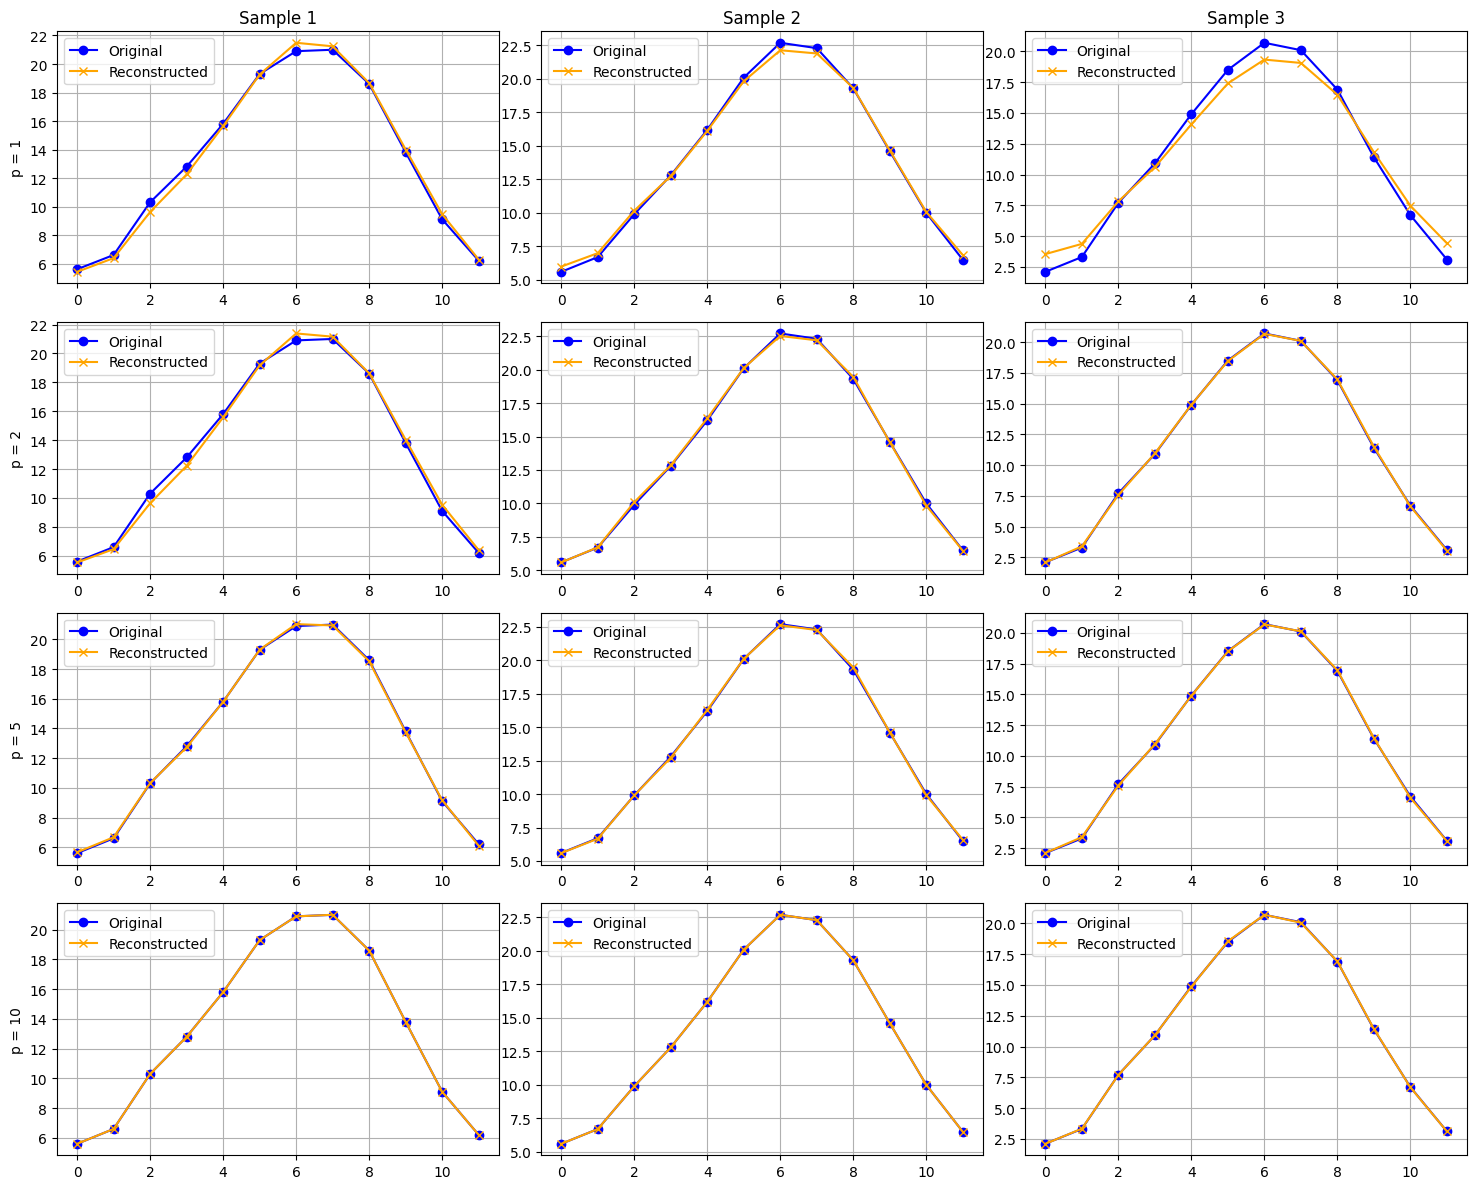

In [34]:
# Define the number of samples to visualize
num_samples_to_plot = 3

# Select random indices for the samples to visualize
random_indices = np.random.choice(range(temperature.shape[0]), num_samples_to_plot, replace=False)

# Define the subspace dimensions to test
subspace_dimensions = [1, 2, 5, 10]

# Set up the figure for plotting
plt.figure(figsize=(15, len(subspace_dimensions) * 3))

# Loop over the subspace dimensions
for i, p in enumerate(subspace_dimensions):
    # Perform PCA with p components
    pca = PCA(n_components=p)
    projected_data = pca.fit_transform(temperature)
    reconstructed_data = pca.inverse_transform(projected_data)
    
    # Plot the original and reconstructed samples together
    for j, idx in enumerate(random_indices):
        plt.subplot(len(subspace_dimensions), num_samples_to_plot, i * num_samples_to_plot + j + 1)
        
        # Original sample in blue
        plt.plot(temperature[idx], marker='o', label='Original', color='blue')
        
        # Reconstructed sample in orange
        plt.plot(reconstructed_data[idx], marker='x', label='Reconstructed', color='orange')
        
        # Add labels and titles
        if j == 0:
            plt.ylabel(f'p = {p}')
        if i == 0:
            plt.title(f'Sample {j + 1}')
        
        plt.legend()
        plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

It's clear that from p=2, the reconstructed data is very close to the original data, indicating that the first two principal components capture most of the variance in the dataset. This suggests that the temperature data for French cities can be effectively represented in a lower-dimensional space while retaining the essential information about temperature patterns and variations.

**Manifold Learning : TSNE**

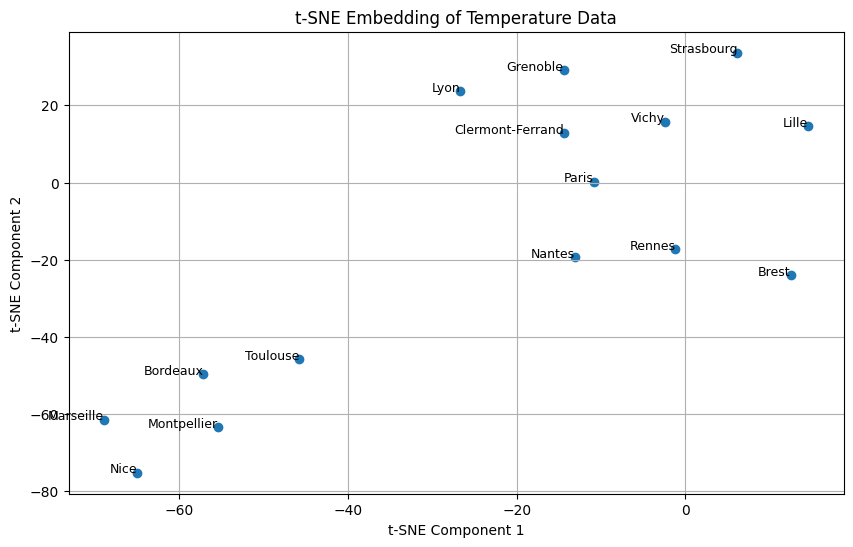

In [35]:
from sklearn.manifold import TSNE

# Compute t-SNE embedding for the temperature dataset
tsne_temp = TSNE(n_components=2, perplexity=5, random_state=42)
temperature_embedding = tsne_temp.fit_transform(temperature)

# Plot the t-SNE embedding for the temperature dataset
plt.figure(figsize=(10, 6))
plt.scatter(temperature_embedding[:, 0], temperature_embedding[:, 1], marker='o')

# Annotate each point with the city name
for i, city in enumerate(villes):
    plt.text(temperature_embedding[i, 0], temperature_embedding[i, 1], city, fontsize=9, ha='right')

plt.title("t-SNE Embedding of Temperature Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

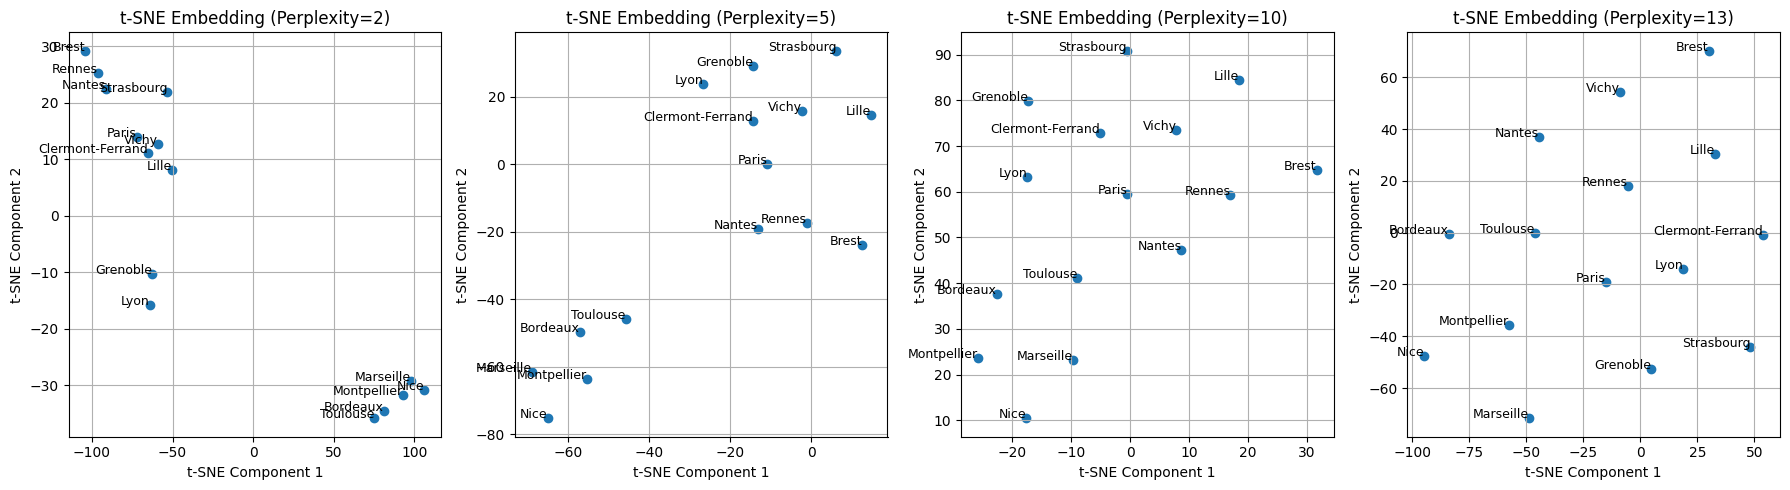

In [36]:
from sklearn.manifold import TSNE

# Define different values of perplexity to test
perplexities = [2, 5, 10,13]

# Set up the figure for plotting
plt.figure(figsize=(18, 5))

# Loop over the different values of perplexity
for i, perplexity in enumerate(perplexities):
    # Compute t-SNE embedding for the temperature dataset with the current perplexity
    tsne_temp = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    temperature_embedding = tsne_temp.fit_transform(temperature)
    
    # Create a subplot for each perplexity value
    plt.subplot(1, len(perplexities), i + 1)
    
    # Plot the t-SNE embedding for the temperature dataset
    plt.scatter(temperature_embedding[:, 0], temperature_embedding[:, 1], marker='o')
    
    # Annotate each point with the city name
    for j, city in enumerate(villes):
        plt.text(temperature_embedding[j, 0], temperature_embedding[j, 1], city, fontsize=9, ha='right')
    
    # Add plot titles and labels
    plt.title(f"t-SNE Embedding (Perplexity={perplexity})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Using t-SNE with perplexity = 2, three distinct clusters emerged, representing regions with similar temperature profiles. This aligns with findings from k-means and Gaussian Mixture Models (GMM), indicating that the temperature data has identifiable structures.

However, as the perplexity increases, the clusters become less interpretable. In fact, since perplexity is a measure of the number of nearest neighbors used in the algorithm, higher perplexity values can lead to more global structures being captured, potentially obscuring local relationships.

***Digits Dataset***

**Data Loading**

In [40]:
data2 = np.load("digits.npz") #load the data

**Data Exploration**

In [41]:
data2.files

['xt', 'yt', 'y', 'x']

In [46]:
# Extract the data
x2 = data2['x']      # Training images (3000, 784)
y2 = data2['y']      # Labels (3000,)

# Normalize pixel values to range [0, 1]
x2 = x2 / 255.0

In [45]:
x2.shape

(3000, 784)

In [44]:
x2[0].shape

(784,)

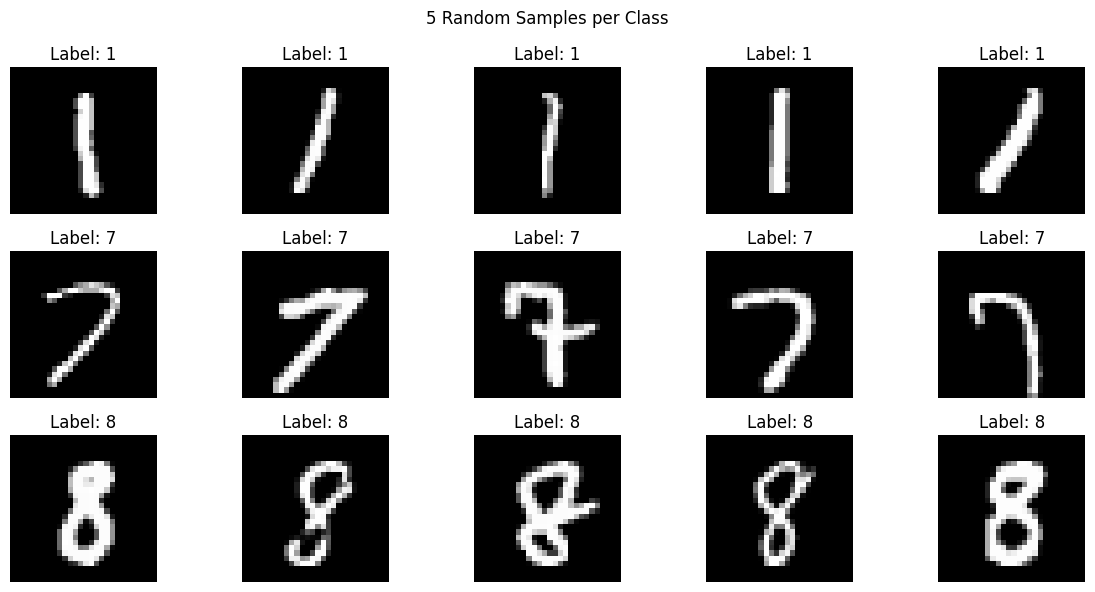

In [49]:
# Get unique class labels
classes = np.unique(y2)

# Set up plot: 3 rows (classes), 5 columns (examples)
plt.figure(figsize=(12, 6))
for row, label in enumerate(classes):
    # Find indices of samples with the current label
    indices = np.where(y2 == label)[0]
    # Randomly pick 5 of them
    selected = np.random.choice(indices, size=5, replace=False)
    
    # Plot the 5 selected images
    for col, idx in enumerate(selected):
        plt.subplot(len(classes), 5, row * 5 + col + 1)
        plt.imshow(x2[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')

plt.suptitle("5 Random Samples per Class")
plt.tight_layout()
plt.show()

**K-means clustering**

Although we know there are 3 classes in the digits dataset (digits 1, 7, and 8), we will still apply the elbow method to verify if K=3 is supported by the data. This helps us check whether the natural structure of the data aligns with the class labels.

**Elbow Method to Find Optimal K**

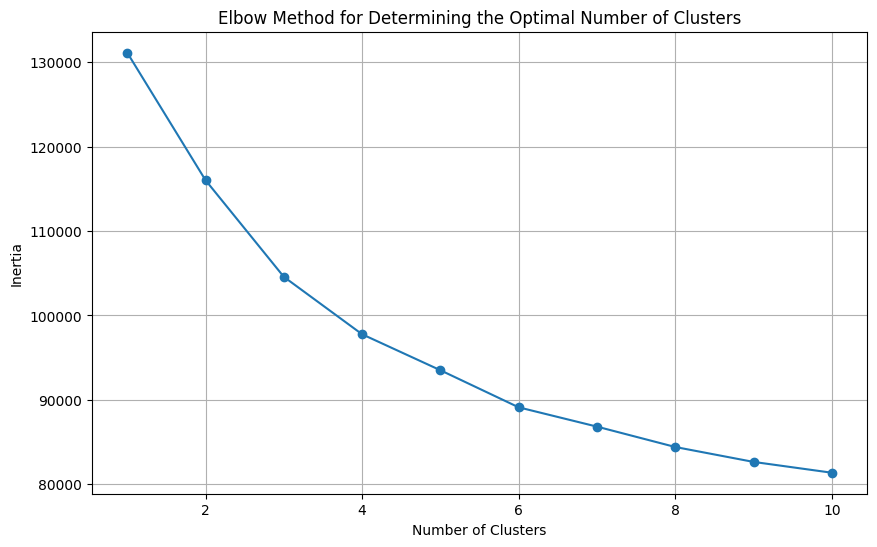

In [50]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x2)
    inertias.append(kmeans.inertia_)

# Plot the inertia curve as a function of the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Determining the Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

The elbow plot shows a clear drop in inertia between K=1 and K=3, with diminishing returns beyond that point. While the curve continues to decrease after K=3, the rate of improvement becomes smaller.

**K-Means with K=3**

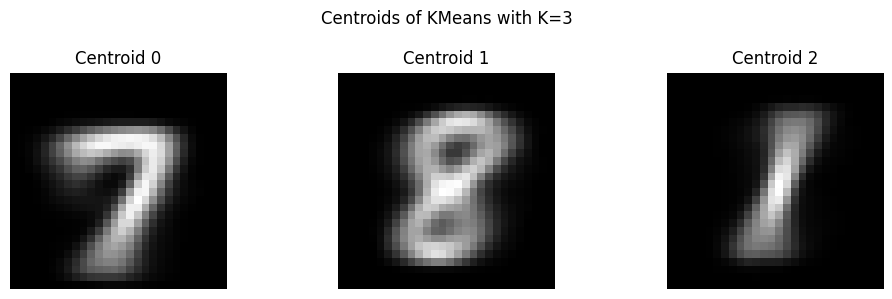

In [51]:
# KMeans with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(x2)  # store labels
centroids = kmeans.cluster_centers_        # cluster centers

# Visualize centroids 
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(centroids[i].reshape(28, 28), cmap='gray')
    plt.title(f"Centroid {i}")
    plt.axis('off')

plt.suptitle("Centroids of KMeans with K=3")
plt.tight_layout()
plt.show()

We can observe that the K-means algorithm successfully clusters the digits into 3 distinct groups and samples are clustered by class on digits. The algorithm is trained based on the pixel values of the images and showed a good performance in separating the digits into different clusters.

- Cluster 0 contains mainly digit "7".
- Cluster 1 contains mainly digit "8".
- Cluster 2 contains mainly digit "1".

The cluster centroids resemble real digits, but they are not actual images from the dataset. Instead, each centroid is the average of all the images assigned to that cluster. This is why they look a bit blurry. They capture the general shape of a digit (like "1", "7", or "8"), but lack sharp details. That's because KMeans minimizes intra-cluster distance by computing the mean of points, not choosing an actual sample.

**K-Means with K=2**

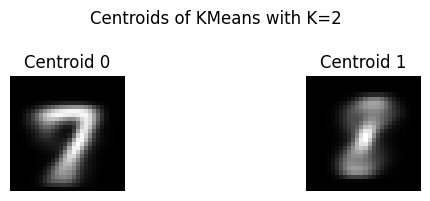

In [55]:
# KMeans with K=2
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_labels = kmeans.fit_predict(x2)  # store labels
centroids = kmeans.cluster_centers_        # cluster centers

# Visualize centroids 
plt.figure(figsize=(7, 2))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(centroids[i].reshape(28, 28), cmap='gray')
    plt.title(f"Centroid {i}")
    plt.axis('off')

plt.suptitle("Centroids of KMeans with K=2")
plt.tight_layout()
plt.show()

Here, the k-means algorithm is trained with k=2 and supposed that digits corresponding to 1 and 8 are in the same cluster.

**K-Means with K=4**

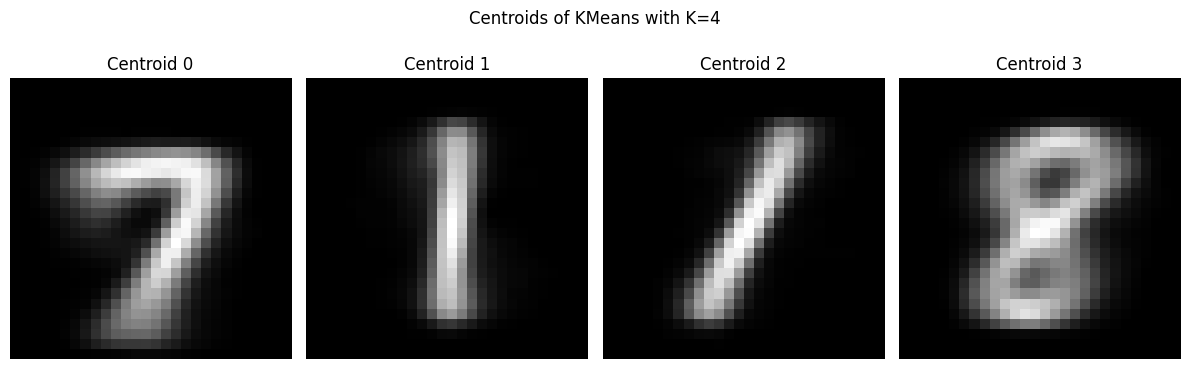

In [56]:
# KMeans with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
predicted_labels = kmeans.fit_predict(x2)  # store labels
centroids = kmeans.cluster_centers_        # cluster centers

# Visualize centroids 
plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(centroids[i].reshape(28, 28), cmap='gray')
    plt.title(f"Centroid {i}")
    plt.axis('off')

plt.suptitle("Centroids of KMeans with K=4")
plt.tight_layout()
plt.show()

Here, the k-means algorithm is trained with k=4 and supposed that there are 2 clusters for digits corresponding to 1. So, it's obvious that the best number of clusters is 3 where each cluster corresponds to a digit class.

Back to k=3

In [69]:
# KMeans with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(x2)  # store labels
centroids = kmeans.cluster_centers_        # cluster centers

In [70]:
predicted_labels

array([2, 2, 2, ..., 1, 1, 1], shape=(3000,), dtype=int32)

In [71]:

np.unique(predicted_labels)

array([0, 1, 2], dtype=int32)

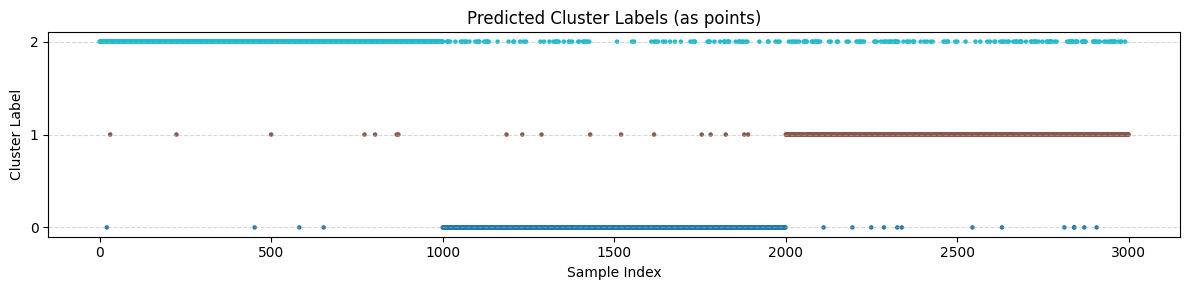

In [76]:
plt.figure(figsize=(12, 3))
plt.scatter(np.arange(len(predicted_labels)), predicted_labels, 
            c=predicted_labels, cmap='tab10', s=5)

plt.title("Predicted Cluster Labels (as points)")
plt.xlabel("Sample Index")
plt.ylabel("Cluster Label")
plt.yticks([0, 1, 2])  
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The predicted cluster labels are mostly piecewise constant, indicating that KMeans with K=3 captures the general class structure. However, we observe that some digits, especially 7 and 8, are assigned to cluster 2, which is mainly associated with digit 1. This suggests that the algorithm sometimes confuses these digits with 1, likely because of visual similarities or variations in handwriting. This highlights the sensitivity of KMeans to how data is represented

In [78]:
# Compute the quality of the clustering using the ground truth labels 

# Compute the rand score
rand_index = rand_score(y2, predicted_labels)
print(f"Rand Score: {rand_index}")

# Compute the Adjusted Rand score
ari_rand_index = adjusted_rand_score(y2, predicted_labels)
print(f"Adjusted Rand Index: {ari_rand_index}")

Rand Score: 0.8851168167166833
Adjusted Rand Index: 0.7431111778078265


To evaluate the quality of the KMeans clustering, we computed both the Rand Score and the Adjusted Rand Index using the true digit labels. The Rand Score was 0.885, indicating that approximately 88.5% of all pairs of samples were consistently assigned in both the predicted and true labelings. This reflects the overall agreement between the two clusterings.

The Adjusted Rand Index (ARI) was 0.743, which corrects for chance agreement. This score suggests that the clustering result aligns well with the true class structure of the dataset. Although not perfect, the ARI confirms that the KMeans algorithm captured meaningful patterns in the data, despite some confusion between similar digits such as 1, 7, and 8.


Next, we will adjust the value of K and repeat the previous two steps to identify the optimal values that yield the best results based on the Rand Index and Adjusted Rand Index.

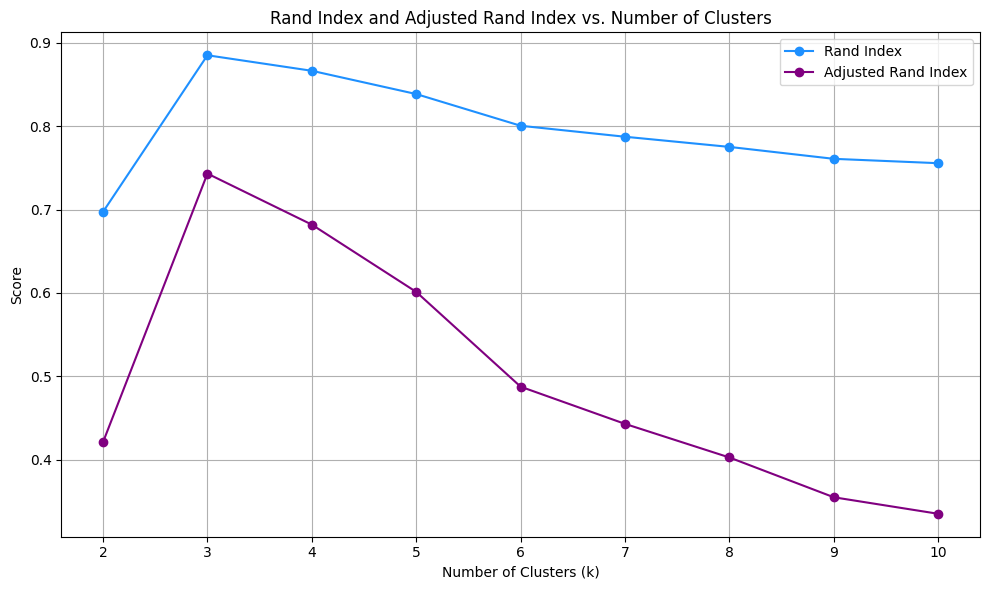

In [79]:
# Define a range of k values to test
k_values = range(2, 11)

# Initialize lists to store the Rand Index and Adjusted Rand Index for each k
rand_indices = []
adjusted_rand_indices = []

# Loop over the range of k values
for k in k_values:
    # Apply the KMeans algorithm
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(x2)
    
    # Compute the Rand Index
    rand_index = rand_score(y2, clusters)
    rand_indices.append(rand_index)
    
    # Compute the Adjusted Rand Index
    adjusted_rand_index = adjusted_rand_score(y2, clusters)
    adjusted_rand_indices.append(adjusted_rand_index)

# Plot both the Rand Index and Adjusted Rand Index for each k in the same figure
plt.figure(figsize=(10, 6))

plt.plot(k_values, rand_indices, marker='o', color='dodgerblue', label="Rand Index")
plt.plot(k_values, adjusted_rand_indices, marker='o', color='purple', label="Adjusted Rand Index")

plt.title("Rand Index and Adjusted Rand Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

This plot shows that the best clustering performance is achieved at K=3, where both the Rand Index and Adjusted Rand Index reach their highest values. This aligns with the true number of digit classes ("1", "7", and "8"). For larger K, the scores drop, indicating that over-segmentation reduces clustering quality.

**Density Estimation**

Starting with k=3

In [80]:

gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)

# Fit the GMM model to the digits data
gmm.fit(x2)

# Predict the cluster labels for each sample
gmm_labels = gmm.predict(x2)

# Print the means and covariances of the GMM components
print("Means of GMM components:\n", gmm.means_)
print("\nCovariances of GMM components:\n", gmm.covariances_)

Means of GMM components:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Covariances of GMM components:
 [[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
 [1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
 [1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]]


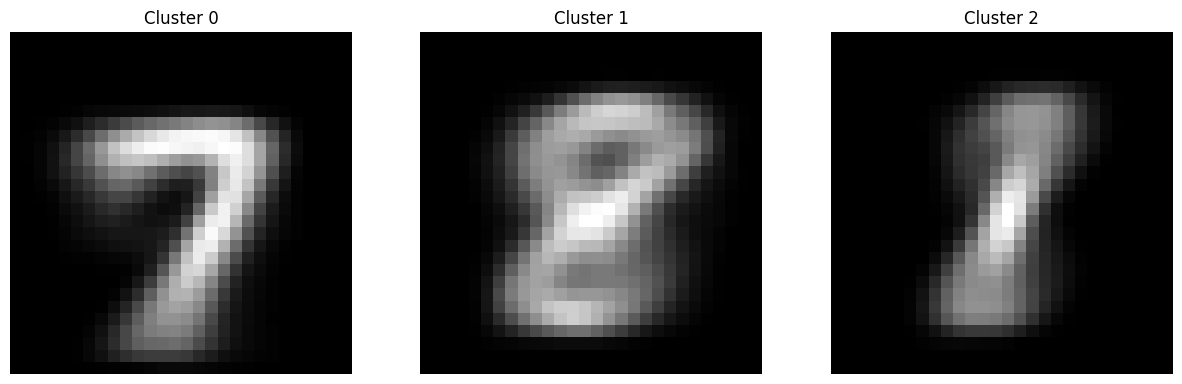

In [84]:
# Plot the centers of the Gaussian distributions in the mixture
plt.figure(figsize=(15, 5))

# Iterate through each cluster in the GMM
for i, mean in enumerate(gmm.means_):
    plt.subplot(1, gmm.n_components, i +1)
    plt.imshow(mean.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i}')

plt.show()

The centers of the Gaussian distributions in the mixture model represent the mean pixel values for each cluster. It's clear that the clusters are well separated and represent distinct groups of digits ("1", "7", and "8") even though the centers don't correspond to any true digit image.

For k=4 : 

Means of GMM components:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Covariances of GMM components:
 [[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
 [1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
 [1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
 [1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]]


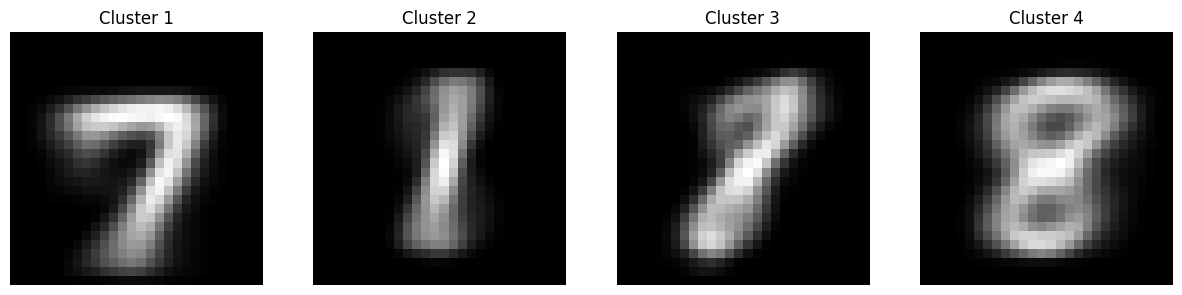

In [85]:
# Initialize the GMM model with 3 components and diagonal covariance type
gmm = GaussianMixture(n_components=4, covariance_type='diag', random_state=42)

# Fit the GMM model to the digits data
gmm.fit(x2)

# Predict the cluster labels for each sample
gmm_labels = gmm.predict(x2)

# Print the means and covariances of the GMM components
print("Means of GMM components:\n", gmm.means_)
print("\nCovariances of GMM components:\n", gmm.covariances_)

# Plot the centers of the Gaussian distributions in the mixture
plt.figure(figsize=(15, 5))

# Iterate through each component (cluster) in the GMM
for i, mean in enumerate(gmm.means_):
    plt.subplot(1, gmm.n_components, i + 1)
    plt.imshow(mean.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i + 1}')

plt.show()

When changing the number of clusters to 4, we can see that the model creates two clusters for the digit 1. This is because the digit 1 can be written in different ways, leading to variations in the pixel values. So, it's clear that the best number of clusters is 3 where each cluster corresponds to a digit class.

**Log Probability**

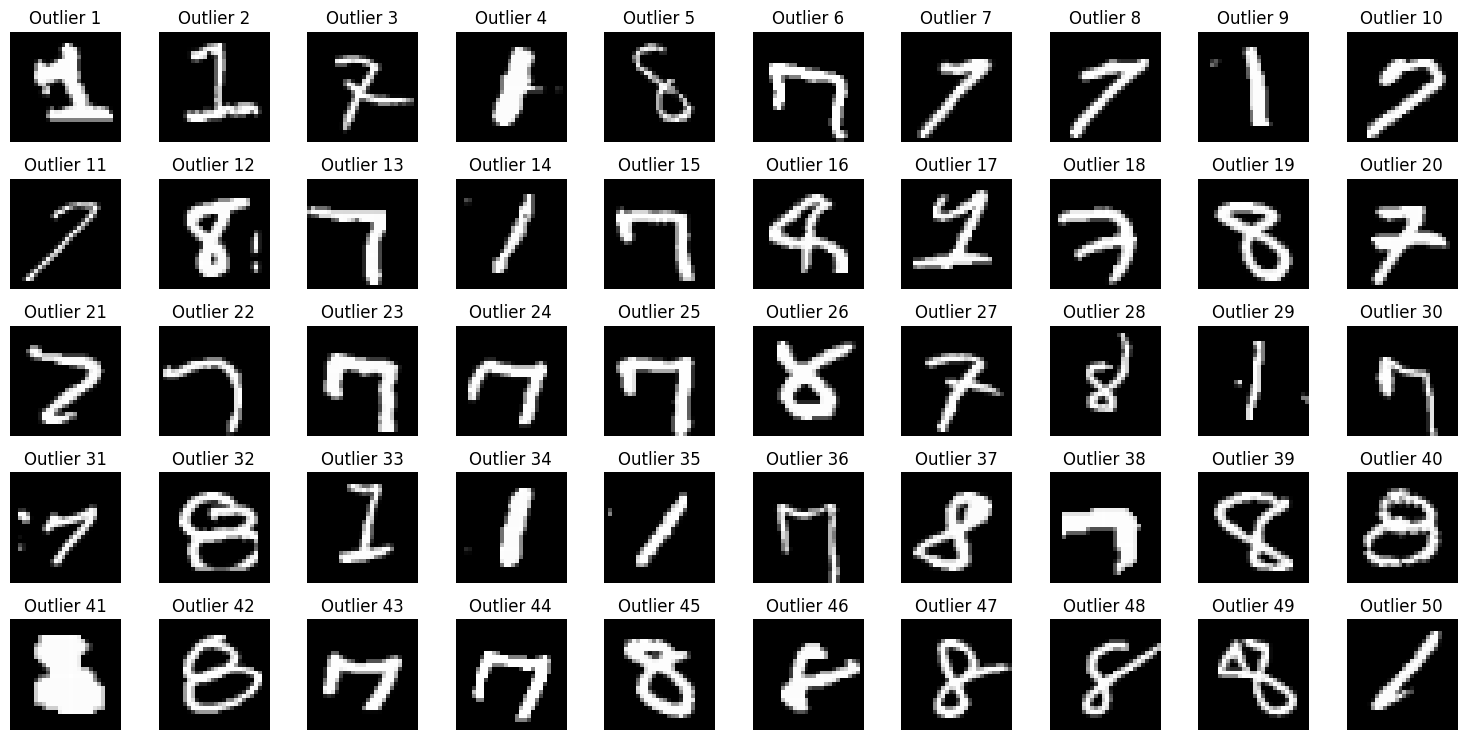

In [86]:
# Initialize the GMM model with 3 components and diagonal covariance type
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)

# Fit the GMM model to the digits data
gmm.fit(x2)

# Compute the log probability (log likelihood) for each sample
log_probs = gmm.score_samples(x2)

# Sort the samples by log probability to find the ones with the smallest scores (potential outliers)
outlier_indices = np.argsort(log_probs)[:50]  # Take the 50 samples with the lowest log probability

# Recover the outlier samples
outlier_samples = x2[outlier_indices]

# Plot the outlier samples
n_outliers = outlier_samples.shape[0]
n_cols = 10  # Number of columns in the plot
n_rows = n_outliers // n_cols + (n_outliers % n_cols > 0)  # Calculate number of rows needed

plt.figure(figsize=(15, n_rows * 1.5))

for i, sample in enumerate(outlier_samples):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(sample.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Outlier {i + 1}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

This method works well to identify outliers in the dataset, as it can detect samples that are not well written or that deviate significantly from the average pixel values of the digits. These outliers can be removed in order to improve the clustering performance and obtain more accurate results after training the algorithm.

In [87]:
# Initialize the GMM model with 3 components and diagonal covariance type
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=42)

# Fit the GMM model to the data
gmm.fit(x2)

# Estimate the labels of the samples
predicted_labels = gmm.predict(x2)

# Compute the clustering Rand score
# Note: true_labels should be the ground truth labels of your dataset
rand_score_value = rand_score(y2, predicted_labels)

print(f'Rand Score: {rand_score_value}')

Rand Score: 0.7613113259975547



A Rand score of 0.76 (approximately 0.76) indicates a relatively high level of agreement between the predicted clustering and the true labels of our data. However, K-means clustering gives a better rand score than the Gaussian Mixture Model (GMM) with a score of 0.88.

**Dimensionality Reduction**

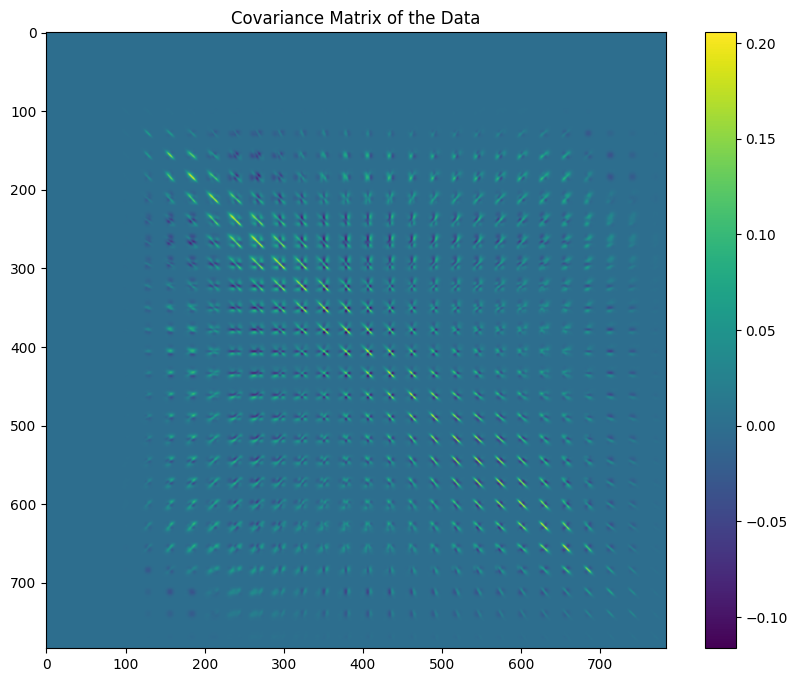

In [88]:
# Compute the covariance matrix of the data
cov_matrix = np.cov(x2.T)

# Plot the covariance matrix as an image
plt.figure(figsize=(10, 8))
plt.imshow(cov_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Covariance Matrix of the Data')
plt.show()

High covariance values are predominantly concentrated in the center of the covariance matrix, especially along the diagonal. This suggests that pixels in the central regions of the images exhibit significant variability within the dataset. In contrast, the low covariance values near the matrix edges indicate that pixels in the peripheral regions remain relatively stable, as they mostly correspond to the background, which shows minimal variation.

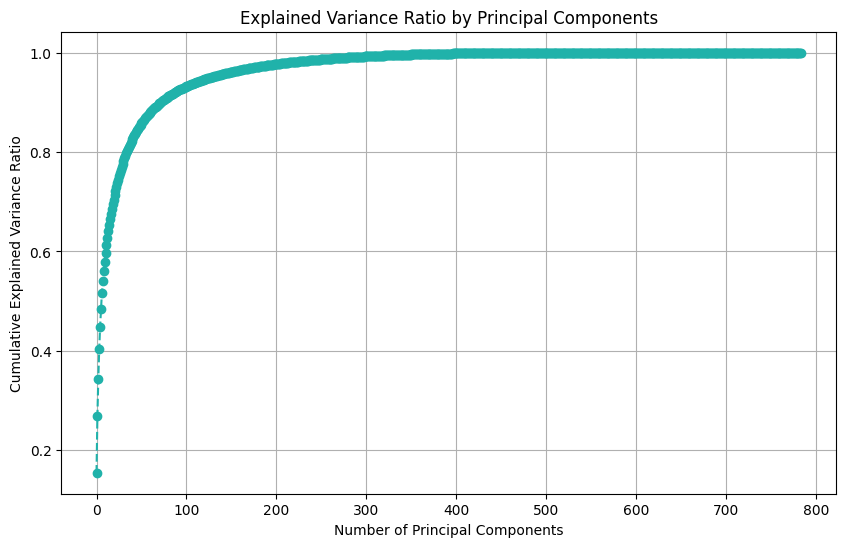

Explained Variance with 2 Principal Components: 0.27


In [89]:
pca = PCA(n_components=None)

# Fit PCA on the data 
pca.fit(x2)

# Recover the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--', color='lightseagreen')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Discuss the quantity of information preserved when projecting on p = 2 dimensions
explained_variance_p2 = np.sum(explained_variance_ratio[:2])
print(f"Explained Variance with 2 Principal Components: {explained_variance_p2:.2f}")

The explained Variance with 2 Principal Components is 0.27, which means that the two components explain 27% of the variance in the data. This indicates that the two principal components capture a significant portion of the data's variability but are not sufficient to represent the entire dataset. And it would be better to use more components to capture more variance such as 100 components.

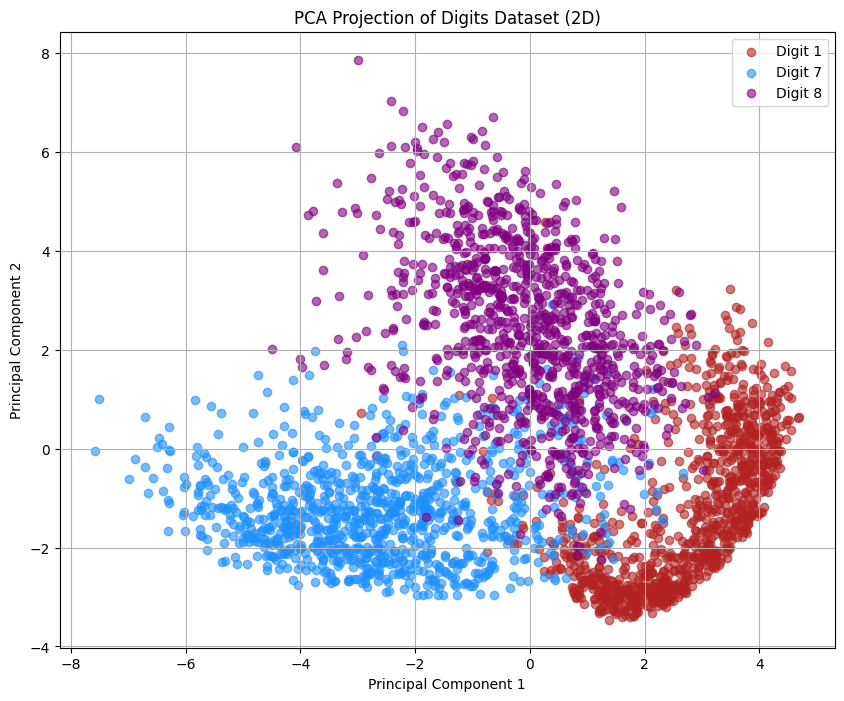

In [90]:
# Initialize PCA with n_components=2 to reduce the data to 2 dimensions
pca_2d = PCA(n_components=2)

# Fit PCA on the digits data and transform the data to 2 dimensions
x2_pca = pca_2d.fit_transform(x2)

# Plot the projected samples in 2D space, colored by their true class labels
plt.figure(figsize=(10, 8))

# Define a color map for the classes
colors = ['firebrick', 'dodgerblue', 'purple']

# Scatter plot of the projected samples
for i, digit in enumerate(np.unique(y2)):
    plt.scatter(x2_pca[y2 == digit, 0], x2_pca[y2 == digit, 1], 
                color=colors[i], label=f'Digit {digit}', alpha=0.6)

plt.title('PCA Projection of Digits Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

After projecting the digit images into 2D using PCA, we observe three distinct clusters corresponding well to the digit classes 1, 7, and 8. This shows that PCA preserves enough structure in the data to separate the classes linearly in two dimensions. While some overlap exists (especially between digits 7 and 8), the projection still captures most of the class-related variation, confirming that PCA reflects meaningful relationships in the original high-dimensional space.

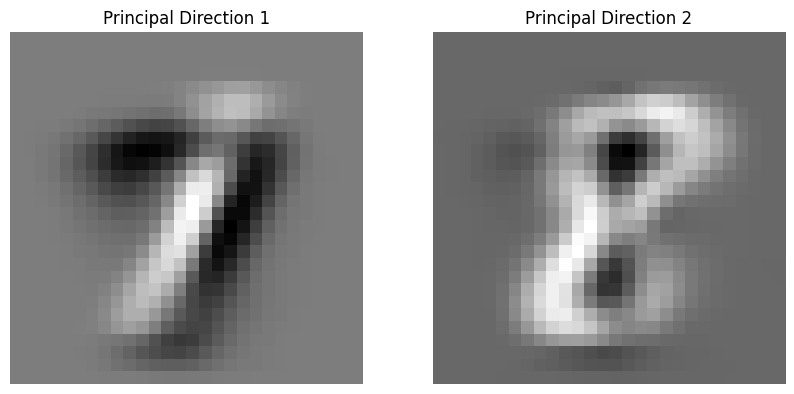

In [91]:
# Get the first two principal directions (components)
first_two_components = pca.components_[:2]

# Plot the digits corresponding to the first two principal directions
plt.figure(figsize=(10, 5))

for i, component in enumerate(first_two_components):
    plt.subplot(1, 2, i + 1)
    plt.imshow(component.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Principal Direction {i + 1}')

plt.show()

1. First Image: Resembles the Shape of a "1" or "7"

- This image corresponds to the first principal component, which captures the first-largest variation in the dataset.

- Since it resembles the shape of a "1" or "7", this indicates that the first principal direction captures the variation in digits with simpler, more linear shapes (such as "1", "7", or similar).

The second principal component might focus on straight-line features and how they differ between digits. For example, "1" and "7" are distinguished by their simplicity, and the second component could be capturing the presence or absence of diagonal or horizontal strokes, which distinguish these digits from others.
Moving along this direction could impact the thickness or curvature of the straight lines, emphasizing or diminishing characteristics like the top stroke of a "7" or the straightness of a "1".

2. Second Image: Resembles the Shape of a "8"

Since it resembles the shape of an "8", this suggests that many samples in the dataset share common features with the digit "8" or similar shapes. The digit "8" has a relatively complex structure with two loops (top and bottom), which contributes to significant variability in the dataset.

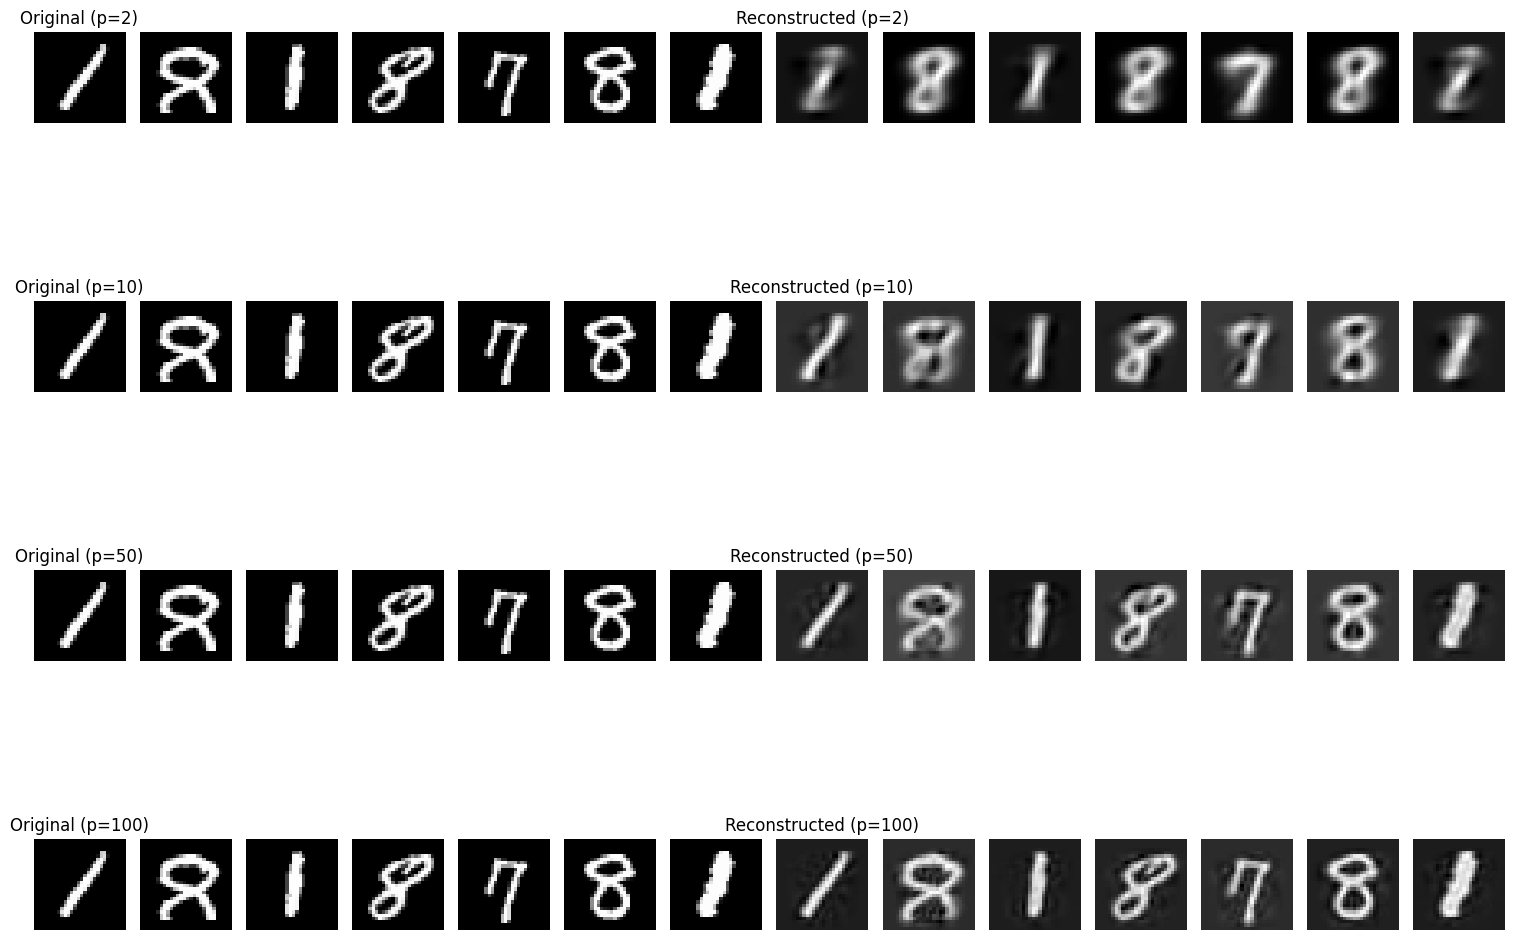

In [92]:
# Define the subspace dimensions to test
subspace_dimensions = [2, 10, 50, 100]

# Select a few samples to plot
sample_indices = np.random.choice(len(x2), 7, replace=False)
original_samples = x2[sample_indices]

# Plot the original and reconstructed samples
plt.figure(figsize=(15, len(subspace_dimensions) * 3))

for i, p in enumerate(subspace_dimensions):
    # Initialize PCA with n_components=p
    pca = PCA(n_components=p)
    
    # Fit PCA on the data and transform the data to p dimensions
    x2_pca = pca.fit_transform(x2)
    
    # Reconstruct the data from the projected samples
    x2_reconstructed = pca.inverse_transform(x2_pca)
    
    # Get the reconstructed samples
    reconstructed_samples = x2_reconstructed[sample_indices]
    
    for j, (original, reconstructed) in enumerate(zip(original_samples, reconstructed_samples)):
        # Plot the original sample
        plt.subplot(len(subspace_dimensions), 2 * len(sample_indices), i * 2 * len(sample_indices) + j + 1)
        plt.imshow(original.reshape(28, 28), cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(f'Original (p={p})')
        
        # Plot the reconstructed sample
        plt.subplot(len(subspace_dimensions), 2 * len(sample_indices), i * 2 * len(sample_indices) + len(sample_indices) + j + 1)
        plt.imshow(reconstructed.reshape(28, 28), cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(f'Reconstructed (p={p})')

plt.tight_layout()
plt.show()

It's clear that when p=100, the reconstruction error is very low which means that the model is able to reconstruct the data with a very high accuracy but we can still can recognize the digits in the reconstructed images for p=10.

The impact of p on the quality of reconstruction is evident in the images. As p increases, the quality of the reconstructed images improves, with more details and clearer shapes visible in the digits. This is because higher values of p allow the model to capture more information and variability in the data, resulting in more accurate reconstructions.

**Manifold Learning : TSNE**

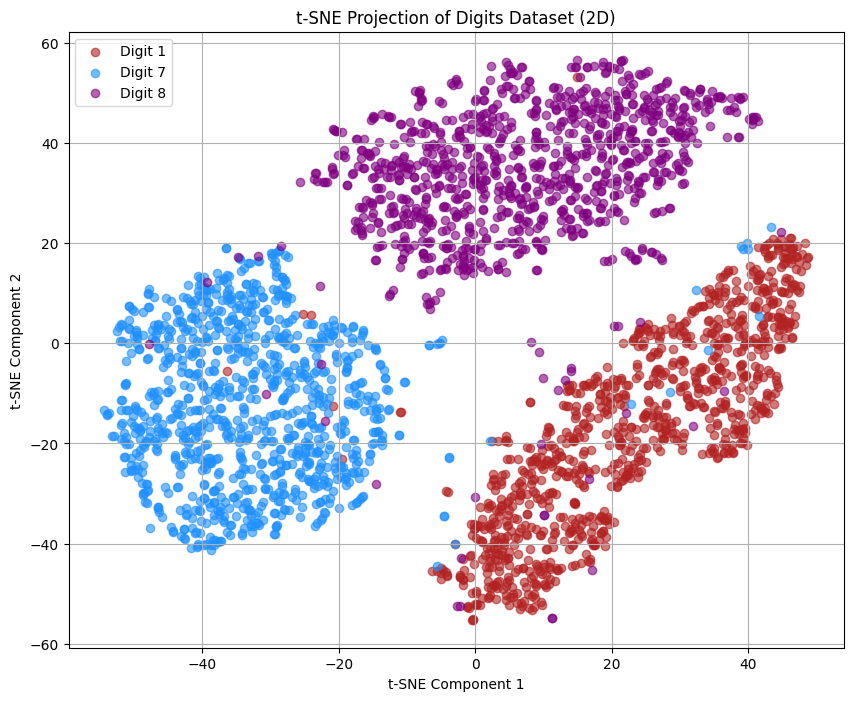

In [ ]:
# Initialize t-SNE with n_components=2 to reduce the data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42) 

# Fit t-SNE on the digits data and transform the data to 2 dimensions
x2_tsne = tsne.fit_transform(x2)

# Plot the projected samples in 2D space, colored by their true class labels
plt.figure(figsize=(10, 8))

# Define a color map for the classes
colors = ['firebrick', 'dodgerblue', 'purple']

# Scatter plot of the projected samples
for i, digit in enumerate(np.unique(y2)):
    plt.scatter(x2_tsne[y2 == digit, 0], x2_tsne[y2 == digit, 1], 
                color=colors[i], label=f'Digit {digit}', alpha=0.6)

plt.title('t-SNE Projection of Digits Dataset (2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

The t-SNE algorithm has successfully separated the digits into distinct clusters.

Let's try with another perplexity value to see if we can get better results.

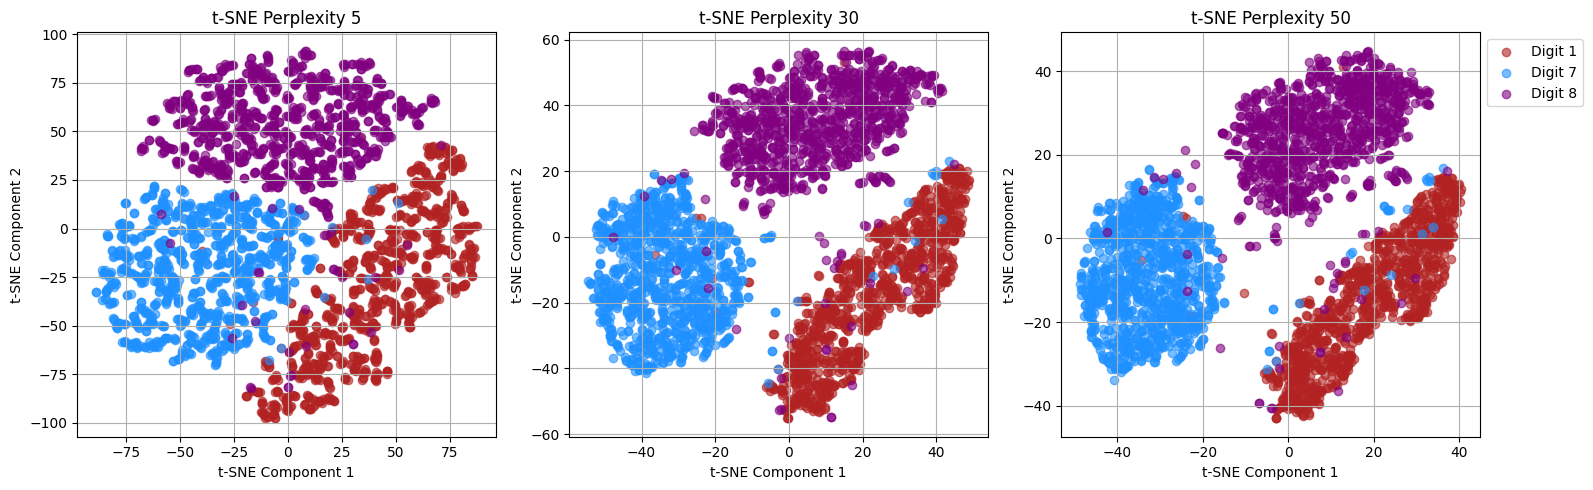

In [94]:
# Define the perplexity values to explore
perplexities = [5, 30, 50]

# Define a color map for the classes
colors = ['firebrick', 'dodgerblue', 'purple']

# Create a figure with subplots, one for each perplexity
plt.figure(figsize=(15, 5))

# Loop over each perplexity value and plot the t-SNE projection in a subplot
for idx, perplexity in enumerate(perplexities):
    # Initialize t-SNE with the current perplexity value
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)

    # Fit t-SNE on the digits data and transform the data to 2 dimensions
    x2_tsne = tsne.fit_transform(x2)

    # Create a subplot for each perplexity value
    plt.subplot(1, len(perplexities), idx + 1)

    # Scatter plot of the projected samples
    for i, digit in enumerate(np.unique(y2)):
        plt.scatter(x2_tsne[y2 == digit, 0], x2_tsne[y2 == digit, 1], 
                    color=colors[i], label=f'Digit {digit}', alpha=0.6)

    # Add title and labels
    plt.title(f't-SNE Perplexity {perplexity}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True)

# Adjust layout and show the figure
plt.tight_layout()
plt.legend(loc='best', bbox_to_anchor=(1, 1))  # Legend outside the plot
plt.show()

Effect of Perplexity in t-SNE:

- Low perplexity (e.g., 5): Focuses on local structures, emphasizing small clusters but potentially losing global relationships.

- High perplexity (e.g., 50): Balances local and global structure, revealing larger patterns but sometimes merging small clusters.

Is t-SNE more discriminant than PCA in 2D?

t-SNE:

- Better at separating clusters in 2D due to capturing non-linear relationships.

- More effective for distinguishing between different digits, especially with the right perplexity setting.

PCA:

- Focuses on linear variance and gives a broader view but typically offers less clear separation of clusters compared to t-SNE.

**Conclusion**

This practical session was a valuable opportunity to apply the unsupervised learning techniques introduced in the course, such as clustering, density estimation, and dimensionality reduction. Working directly with real datasets (temperature and digits) helped me understand the importance of data visualization and interpretation beyond numerical results.

At first, the hardest part was understanding how to correctly interpret the clustering results — especially how the K-means and GMM methods group data differently and how the choice of the number of clusters K influences the results. Implementing and tuning parameters in Gaussian Mixture Models and t-SNE was also challenging, as the results can vary significantly depending on initialization and hyperparameters.

Next time, I would take more time to systematically validate parameters (using loops or grid search) and visualize intermediate steps to better understand the model behavior.

In a professional setting, the skills I developed in this session are crucial for data analysis and machine learning projects. The ability to preprocess data, apply various clustering methods, and interpret results will be invaluable in roles focused on data science and analytics. Understanding how to manipulate and visualize data effectively is essential for communicating insights to stakeholders and making informed decisions.

Overall, this session deepened my understanding of unsupervised learning, not only from a technical point of view but also in terms of practical reasoning, interpretation, and visualization.